# Problem: Predicting Airplane Delays

The goals of this notebook are:
- Process and create a dataset from downloaded ZIP files
- Exploratory data analysis (EDA)
- Establish a baseline model and improve it

## Introduction to business scenario
You work for a travel booking website that is working to improve the customer experience for flights that were delayed. The company wants to create a feature to let customers know if the flight will be delayed due to weather when the customers are booking the flight to or from the busiest airports for domestic travel in the US. 

You are tasked with solving part of this problem by leveraging machine learning to identify whether the flight will be delayed due to weather. You have been given access to the a dataset of on-time performance of domestic flights operated by large air carriers. You can use this data to train a machine learning model to predict if the flight is going to be delayed for the busiest airports.

### Dataset
The provided dataset contains scheduled and actual departure and arrival times reported by certified US air carriers that account for at least 1 percent of domestic scheduled passenger revenues. The data was collected by the Office of Airline Information, Bureau of Transportation Statistics (BTS). The dataset contains date, time, origin, destination, airline, distance, and delay status of flights for flights between 2014 and 2018.
The data are in 60 compressed files, where each file contains a CSV for the flight details in a month for the five years (from 2014 - 2018). The data can be downloaded from this link: [https://ucstaff-my.sharepoint.com/:f:/g/personal/ibrahim_radwan_canberra_edu_au/Er0nVreXmihEmtMz5qC5kVIB81-ugSusExPYdcyQTglfLg?e=bNO312]. Please download the data files and place them on a relative path. Dataset(s) used in this assignment were compiled by the Office of Airline Information, Bureau of Transportation Statistics (BTS), Airline On-Time Performance Data, available with the following link: [https://www.transtats.bts.gov/Fields.asp?gnoyr_VQ=FGJ]. 

# Step 1: Problem formulation and data collection

Start this project off by writing a few sentences below that summarize the business problem and the business goal you're trying to achieve in this scenario. Include a business metric you would like your team to aspire toward. With that information defined, clearly write out the machine learning problem statement. Finally, add a comment or two about the type of machine learning this represents. 


### 1. Determine if and why ML is an appropriate solution to deploy.

Machine learning has been used very extensively to determine if there will be delay in flights.Predicting flight delays is an essential and difficult subject in the flight scheduling and planning sector for airports and airlines. Many academic work has been conducted, that has shown great accuracy in statistical measuring scale. Machine learing is an appropriate and proven approach in determining flight delay and related metrics because:
1. **Understanding Complex Patterns:**  Flight delays can be influenced by numerious factors, like weather conditions, operational effectiveness of airports, operations capability of the airiine company and can be compounded by air traffic situation, security issues etc. Right ML model can be used to identify relatable patterns amongst these factors; that can be helpful for more precise prediction. 
2. **Predictive Power:**  Machine learning algorithms uses the past data to establish patterns and record trends amongst involved factors that is helpful for future prediction. Potential delays can be anticipated by training the model with past flight data and weather conditons.
3. **Large Dataset:**  This dataset contains numerous records of flight performance along with the factors and conditions it had to face. Therefore it requires enormous computational capability of ML for prediction.
4. **Future Adjustments and Scaling options:** There is an option for ML models to be constantly updated and retrained with fresh data to enhance accuracy and adapt to changing conditions.

**Reference:**
> https://airclaim.com/10-most-common-causes-of-flight-delays

> https://www.sciencedirect.com/science/article/pii/S1366554518311979?casa_token=UDtqsJxDi0UAAAAA:TZ0mGnCGwbDWMod1bT37kygZtZxZEJWqFupQjjL_pF5FnwJJdf2gfjkCWvh1yKHgWc9Q0CWZcIk#s0070

### 2. Formulate the business problem, success metrics, and desired ML output.

**Business Problem:** 
Flight delays incur major operational and financial expenses for both airlines and passengers. The objective is to formulate a predictive model that can anticipate flight delays based on past data, allowing airlines to improve operations, better allocate resources, and notify passengers in advance.

**Machine Learing Outputs:** 
A binary classification(1/0) outcome that indicates whether a flight will be "delayed" or "on-time"(no delay). This makes airliners possible to identify potential delays and take proactive measures.
There is further option to do regression that predict continuous numeric variables like 'delay time' when there is delay.


**Success Metrics:**
As part of evaluating success of the *Binary Classification* problem, we would see these metrics,
*Accuracy*: the percentage of accurately predicted delays vs non-delays.
*Precision*: The percentage of expected delays that really occur.
*Recall*: The proportion of actual delays that are correctly predicted.
*F1-score*: A harmonic mean of precision and recall, which provides a balanced evaluation of model performance.

Furthermore, Overall performance of the model can be evaluated with it's AUC-ROC score.

**Reference:**
> https://airclaim.com/10-most-common-causes-of-flight-delays

> https://blog.tobiaszwingmann.com/p/evaluation-metrics-predictive-analytics





### 3. Identify the type of ML problem you’re dealing with.

**Problem Identification:**
There is availability of large dataset and our appointed task is to predict delay for certain condition in effect(weather condition favourable or not). With the factors given here, it would be treated as a supervised classification problem, specifically as binary classification. The goal of the model is to predict one of two classes, 'delayed' and 'not-delayed' (on-time), based on the provided features such as weather conditions and other relatable factors.


### Setup

Now that we have decided where to focus our energy, let's set things up so you can start working on solving the problem.

In [1]:
# Loading the necessary libraries or functions
import os
from pathlib import Path
from zipfile import ZipFile
import time

import pandas as pd
import numpy as np
import subprocess

import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

from collections import Counter
import webbrowser

# <please add any other library or function you are aiming to import here>


# Step 2: Data preprocessing and visualization  
In this data preprocessing phase, you should take the opportunity to explore and visualize your data to better understand it. First, import the necessary libraries and read the data into a Pandas dataframe. After that, explore your data. Look for the shape of the dataset and explore your columns and the types of columns you're working with (numerical, categorical). Consider performing basic statistics on the features to get a sense of feature means and ranges. Take a close look at your target column and determine its distribution.

### Specific questions to consider
1. What can you deduce from the basic statistics you ran on the features? 

2. What can you deduce from the distributions of the target classes?

3. Is there anything else you deduced from exploring the data?

Start by bringing in the dataset from an Amazon S3 public bucket to this notebook environment.

In [36]:
# download the files

# <note: make them all relative, absolute path is not accepted>
zip_path = Path('zip_data')
base_path = Path('project_ADP_1')
csv_base_path = Path('csv_data')

!mkdir -p {zip_path}
!mkdir -p {base_path}
!mkdir -p {csv_base_path}


A subdirectory or file -p already exists.
Error occurred while processing: -p.
A subdirectory or file zip_data already exists.
Error occurred while processing: zip_data.
A subdirectory or file -p already exists.
Error occurred while processing: -p.
A subdirectory or file project_ADP_1 already exists.
Error occurred while processing: project_ADP_1.
A subdirectory or file -p already exists.
Error occurred while processing: -p.
A subdirectory or file csv_data already exists.
Error occurred while processing: csv_data.


In [37]:
# Dataset zip file('OneDrive_1_28-10-2024.zip') downloading and saving
# Defining the path
zip_file_download = Path('OneDrive_1_28-10-2024.zip')
download_extract = Path('zip_data')

# Creates extraction directory if it does not exist 
download_extract.mkdir(exist_ok=True)

# Extracting all files in the 'zip_data' folder
with ZipFile(zip_file_download, 'r') as zip_ref:
    zip_ref.extractall(download_extract)



In [38]:
# Knowing how many zip files do we have? write a code to answer it.

# Making a list of all files in the folder 
files_zip_data = [file for file in download_extract.iterdir() if file.is_file()]

# Count of file extension (file type) and their count
files_type = Counter(file.suffix for file in files_zip_data)

# Showing the result
print("File types and their counts:")
for files_type, count in files_type.items():
    print(f"{files_type}: {count}")


File types and their counts:
.zip: 60


#### Extract CSV files from ZIP files

In [39]:
# defining the function to unzip
def zip2csv(zip_file_name, file_path): 
    """
    Extracts CSV files from ZIP archives.
    zip_file_name: name of the ZIP file
    file_path: folder where extracted files will be stored
    """
    try:
        with ZipFile(zip_file_name, 'r') as z: 
            print(f'Extracting {zip_file_name.name}') 
            z.extractall(path=file_path) 
    except Exception as e:
        print(f'zip2csv failed for {zip_file_name.name}: {e}')

# Defining paths
zip_data_path = Path('zip_data')      # Folder of ZIP files
csv_base_path = Path('csv_data')      # Folder to store extracted files
csv_base_path.mkdir(exist_ok=True)    # Creates csv_data folder if it doesn't exist

# For extracting all ZIP files in the 'zip_data' folder
for zip_file in zip_data_path.glob('*.zip'):
    zip2csv(zip_file, csv_base_path)

print("All files extracted.")


Extracting On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_1.zip
Extracting On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_10.zip
Extracting On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_11.zip
Extracting On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_12.zip
Extracting On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_2.zip
Extracting On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_3.zip
Extracting On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_4.zip
Extracting On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_5.zip
Extracting On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_6.zip
Extracting On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_7.zip
Extracting On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_8.zip
Extracting On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_9.zip
Extracting On_Time_Report

In [40]:
# How many csv files have we extracted? write a code to answer it.

# Making list of all files in 'csv_data' folder
csv_extracted = Path('csv_data')
# List of items to get all files in the 'csv_data' folder
files_csv_data = [file for file in csv_extracted.iterdir() if file.is_file() and file.suffix == '.csv']

# Print the count of .csv files
print(f".csv file count: {len(files_csv_data)}")


.csv file count: 60


Before loading the CSV file, read the HTML file from the extracted folder. This HTML file includes the background and more information on the features included in the dataset.

In [41]:
from IPython.display import IFrame
IFrame(src=os.path.relpath(f"{csv_base_path}readme.html"), width=300, height=200)

# Other Option to look into the file
# Specifying the location of 'readme.html'
html_path = Path('csv_data/readme.html')
# Opening the file
webbrowser.open(html_path)


True

#### Load sample CSV

Before combining all the CSV files, get a sense of the data from a single CSV file. Using Pandas, read the `On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2018_9.csv` file first. You can use the Python built-in `read_csv` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)).

In [42]:
# Defining the path to the CSV file
csv_file_path = Path('csv_data/On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2018_9.csv')

# Loading the CSV file into a DataFrame
df = pd.read_csv(csv_file_path)

# Display of the first 5 rows
print("First 5 Rows:")
print(df.head())

# Display of statistical summary of numerical columns
print("\nStatistical Summary:")
print(df.describe())

# Display of data types of each variable
print("\nData types of each column:")
print(df.dtypes)

# Display of counts of missing values in each column
print("\nMissing values count:")
print(df.isnull().sum())

# Display of the count of unique values in each column
print("\nUnique values count per column:")
print(df.nunique())


First 5 Rows:
   Year  Quarter  Month  DayofMonth  DayOfWeek  FlightDate Reporting_Airline  \
0  2018        3      9           3          1  2018-09-03                9E   
1  2018        3      9           9          7  2018-09-09                9E   
2  2018        3      9          10          1  2018-09-10                9E   
3  2018        3      9          13          4  2018-09-13                9E   
4  2018        3      9          14          5  2018-09-14                9E   

   DOT_ID_Reporting_Airline IATA_CODE_Reporting_Airline Tail_Number  ...  \
0                     20363                          9E      N908XJ  ...   
1                     20363                          9E      N315PQ  ...   
2                     20363                          9E      N582CA  ...   
3                     20363                          9E      N292PQ  ...   
4                     20363                          9E      N600LR  ...   

   Div4TailNum  Div5Airport  Div5AirportID  Div5

**Question**: Print the row and column length in the dataset, and print the column names.

In [43]:
# Showing the number of rows and columns
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

# Showing the column names
print("\nColumn Names:")
print(df.columns.tolist())


Number of rows: 585749
Number of columns: 110

Column Names:
['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'FlightDate', 'Reporting_Airline', 'DOT_ID_Reporting_Airline', 'IATA_CODE_Reporting_Airline', 'Tail_Number', 'Flight_Number_Reporting_Airline', 'OriginAirportID', 'OriginAirportSeqID', 'OriginCityMarketID', 'Origin', 'OriginCityName', 'OriginState', 'OriginStateFips', 'OriginStateName', 'OriginWac', 'DestAirportID', 'DestAirportSeqID', 'DestCityMarketID', 'Dest', 'DestCityName', 'DestState', 'DestStateFips', 'DestStateName', 'DestWac', 'CRSDepTime', 'DepTime', 'DepDelay', 'DepDelayMinutes', 'DepDel15', 'DepartureDelayGroups', 'DepTimeBlk', 'TaxiOut', 'WheelsOff', 'WheelsOn', 'TaxiIn', 'CRSArrTime', 'ArrTime', 'ArrDelay', 'ArrDelayMinutes', 'ArrDel15', 'ArrivalDelayGroups', 'ArrTimeBlk', 'Cancelled', 'CancellationCode', 'Diverted', 'CRSElapsedTime', 'ActualElapsedTime', 'AirTime', 'Flights', 'Distance', 'DistanceGroup', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'Securit

**Question**: Print the first 10 rows of the dataset.  

In [44]:
# Display of the first 10 rows of the dataset
print("First 10 rows of the dataset:")
print(df.head(10))

First 10 rows of the dataset:
   Year  Quarter  Month  DayofMonth  DayOfWeek  FlightDate Reporting_Airline  \
0  2018        3      9           3          1  2018-09-03                9E   
1  2018        3      9           9          7  2018-09-09                9E   
2  2018        3      9          10          1  2018-09-10                9E   
3  2018        3      9          13          4  2018-09-13                9E   
4  2018        3      9          14          5  2018-09-14                9E   
5  2018        3      9          16          7  2018-09-16                9E   
6  2018        3      9          17          1  2018-09-17                9E   
7  2018        3      9          20          4  2018-09-20                9E   
8  2018        3      9          21          5  2018-09-21                9E   
9  2018        3      9          23          7  2018-09-23                9E   

   DOT_ID_Reporting_Airline IATA_CODE_Reporting_Airline Tail_Number  ...  \
0            

**Question**: Print all the columns in the dataset. Use `<dataframe>.columns` to view the column names.

In [45]:
print(f'The column names are :\n #############')
for col in df.columns:
    print(col)

The column names are :
 #############
Year
Quarter
Month
DayofMonth
DayOfWeek
FlightDate
Reporting_Airline
DOT_ID_Reporting_Airline
IATA_CODE_Reporting_Airline
Tail_Number
Flight_Number_Reporting_Airline
OriginAirportID
OriginAirportSeqID
OriginCityMarketID
Origin
OriginCityName
OriginState
OriginStateFips
OriginStateName
OriginWac
DestAirportID
DestAirportSeqID
DestCityMarketID
Dest
DestCityName
DestState
DestStateFips
DestStateName
DestWac
CRSDepTime
DepTime
DepDelay
DepDelayMinutes
DepDel15
DepartureDelayGroups
DepTimeBlk
TaxiOut
WheelsOff
WheelsOn
TaxiIn
CRSArrTime
ArrTime
ArrDelay
ArrDelayMinutes
ArrDel15
ArrivalDelayGroups
ArrTimeBlk
Cancelled
CancellationCode
Diverted
CRSElapsedTime
ActualElapsedTime
AirTime
Flights
Distance
DistanceGroup
CarrierDelay
WeatherDelay
NASDelay
SecurityDelay
LateAircraftDelay
FirstDepTime
TotalAddGTime
LongestAddGTime
DivAirportLandings
DivReachedDest
DivActualElapsedTime
DivArrDelay
DivDistance
Div1Airport
Div1AirportID
Div1AirportSeqID
Div1WheelsOn

**Question**: Print all the columns in the dataset that contain the word 'Del'. This will help you see how many columns have delay data in them.

**Hint**: You can use a Python list comprehension to include values that pass certain `if` statement criteria.

For example: `[x for x in [1,2,3,4,5] if x > 2]`  

**Hint**: You can use the `in` keyword ([documentation](https://www.w3schools.com/python/ref_keyword_in.asp)) to check if the value is in a list or not. 

For example: `5 in [1,2,3,4,5]`

In [46]:
# Making comprehensive list for fitering columns having 'Del'
del_columns = [col for col in df.columns if 'Del' in col]

# Showing the list of columns with 'Del'
if del_columns:
    print("Columns containing 'Del':")
    print(*del_columns, sep=", ")
else:
    print("There is no columns with word 'Del'")

# Count the numbr of Del columns    
print(f"Number of columns with 'Del': {len(del_columns)}")

Columns containing 'Del':
DepDelay, DepDelayMinutes, DepDel15, DepartureDelayGroups, ArrDelay, ArrDelayMinutes, ArrDel15, ArrivalDelayGroups, CarrierDelay, WeatherDelay, NASDelay, SecurityDelay, LateAircraftDelay, DivArrDelay
Number of columns with 'Del': 14


Here are some more questions to help you find out more about your dataset.

**Questions**   
1. How many rows and columns does the dataset have?   
2. How many years are included in the dataset?   
3. What is the date range for the dataset?   
4. Which airlines are included in the dataset?   
5. Which origin and destination airports are covered?

In [47]:
# Answer of the above questions
print("The #rows and #columns are ", df.shape[0] , " and ", df.shape[1])
print("The years in this dataset are: ", df['Year'].unique())
print("The months covered in this dataset are: ", df['Month'].unique())
print("The date range for data is :" , min(df['FlightDate']), " to ", max(df['FlightDate']))
print("The airlines covered in this dataset are: ", list(df['Reporting_Airline'].unique()))
print("The Origin airports covered are: ", list(df['Origin'].unique()))
print("The Destination airports covered are: ", list(df['Dest'].unique()))

The #rows and #columns are  585749  and  110
The years in this dataset are:  [2018]
The months covered in this dataset are:  [9]
The date range for data is : 2018-09-01  to  2018-09-30
The airlines covered in this dataset are:  ['9E', 'B6', 'WN', 'YV', 'YX', 'EV', 'AA', 'AS', 'DL', 'HA', 'UA', 'F9', 'G4', 'MQ', 'NK', 'OH', 'OO']
The Origin airports covered are:  ['DFW', 'LGA', 'MSN', 'MSP', 'ATL', 'BDL', 'VLD', 'JFK', 'RDU', 'CHS', 'DTW', 'GRB', 'PVD', 'SHV', 'FNT', 'PIT', 'RIC', 'RST', 'RSW', 'CVG', 'LIT', 'ORD', 'JAX', 'TRI', 'BOS', 'CWA', 'DCA', 'CHO', 'AVP', 'IND', 'GRR', 'BTR', 'MEM', 'TUL', 'CLE', 'STL', 'BTV', 'OMA', 'MGM', 'TVC', 'SAV', 'GSP', 'EWR', 'OAJ', 'BNA', 'MCI', 'TLH', 'ROC', 'LEX', 'PWM', 'BUF', 'AGS', 'CLT', 'GSO', 'BWI', 'SAT', 'PHL', 'TYS', 'ACK', 'DSM', 'GNV', 'AVL', 'BGR', 'MHT', 'ILM', 'MOT', 'IAH', 'SBN', 'SYR', 'ORF', 'MKE', 'XNA', 'MSY', 'PBI', 'ABE', 'HPN', 'EVV', 'ALB', 'LNK', 'AUS', 'PHF', 'CHA', 'GTR', 'BMI', 'BQK', 'CID', 'CAK', 'ATW', 'ABY', 'CAE', 'SRQ

**Question**: What is the count of all the origin and destination airports?

**Hint**: You can use the Pandas `values_count` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html)) to find out the values for each airport using the columns `Origin` and `Dest`.

In [48]:
# Getting the count of all unique 'Origin' and 'Dest'
origin_counts = df['Origin'].value_counts()
dest_counts = df['Dest'].value_counts()

# Creating a DataFrame to show the results
counts_df = pd.DataFrame({'Origin': origin_counts, 'Destination': dest_counts})

counts_df

,Origin,Destination
ABE,303,303
ABI,169,169
ABQ,2077,2076
ABR,60,60
ABY,79,79
...,...,...
WRG,60,60
WYS,52,52
XNA,1004,1004
YAK,60,60


**Question**: Print the top 15 origin and destination airports based on number of flights in the dataset.

**Hint**: You can use the Pandas `sort_values` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html)).

In [49]:
# Count of unique origins and destinations

origin_counts = df['Origin'].value_counts().reset_index()
origin_counts.columns = ['Origin', 'Count']

dest_counts = df['Dest'].value_counts().reset_index()
dest_counts.columns = ['Destination', 'Count']

# Sorting and display of top 15 origins and dest
top_15_origins = origin_counts.sort_values(by='Count', ascending=False).head(15)
print(top_15_origins)

top_15_destinations = dest_counts.sort_values(by='Count', ascending=False).head(15)
print(top_15_destinations)

   Origin  Count
0     ATL  31525
1     ORD  28257
2     DFW  22802
3     DEN  19807
4     CLT  19655
5     LAX  17875
6     SFO  14332
7     IAH  14210
8     LGA  13850
9     MSP  13349
10    LAS  13318
11    PHX  13126
12    DTW  12725
13    BOS  12223
14    SEA  11872
   Destination  Count
0          ATL  31521
1          ORD  28250
2          DFW  22795
3          DEN  19807
4          CLT  19654
5          LAX  17873
6          SFO  14348
7          IAH  14203
8          LGA  13850
9          MSP  13347
10         LAS  13322
11         PHX  13128
12         DTW  12724
13         BOS  12227
14         SEA  11877


**Question**: Given all the information about a flight trip, can you predict if it would be delayed?

**Predicting ArrDelay:**

It is possible to predict arrival delay using information on Origin, Destination, Reporting_Airlines and other relatable factors. By analyzing historical data, it is possible to identify patterns and correlations between these factors and arrival delays. Machine learning models(classification models) can learn from this data and make predictions for arrival delay for new flights.

Now, assume you are traveling from San Francisco to Los Angeles on a work trip. You want to have an ideas if your flight will be delayed, given a set of features, so that you can manage your reservations in Los Angeles better. How many features from this dataset would you know before your flight?

Columns such as `DepDelay`, `ArrDelay`, `CarrierDelay`, `WeatherDelay`, `NASDelay`, `SecurityDelay`, `LateAircraftDelay`, and `DivArrDelay` contain information about a delay. But this delay could have occured at the origin or destination. If there were a sudden weather delay 10 minutes before landing, this data would not be helpful in managing your Los Angeles reservations.

So to simplify the problem statement, consider the following columns to predict an arrival delay:<br>

`Year`, `Quarter`, `Month`, `DayofMonth`, `DayOfWeek`, `FlightDate`, `Reporting_Airline`, `Origin`, `OriginState`, `Dest`, `DestState`, `CRSDepTime`, `DepDelayMinutes`, `DepartureDelayGroups`, `Cancelled`, `Diverted`, `Distance`, `DistanceGroup`, `ArrDelay`, `ArrDelayMinutes`, `ArrDel15`, `AirTime`

You will also filter the source and destination airports to be:
- Top airports: ATL, ORD, DFW, DEN, CLT, LAX, IAH, PHX, SFO
- Top 5 airlines: UA, OO, WN, AA, DL

This should help in reducing the size of data across the CSV files to be combined.

#### Combine all CSV files

**Hint**:  
First, create an empy dataframe that you will use to copy your individual dataframes from each file. Then, for each file in the `csv_files` list:

1. Read the CSV file into a dataframe  
2. Filter the columns based on the `filter_cols` variable

```
        columns = ['col1', 'col2']
        df_filter = df[columns]
```

3. Keep only the subset_vals in each of the subset_cols. Use the `isin` Pandas function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isin.html)) to check if the `val` is in the dataframe column and then choose the rows that include it.

```
        df_eg[df_eg['col1'].isin('5')]
```

4. Concatenate the dataframe with the empty dataframe 

In [50]:
# Defining the columns to keep
# Filtering all the columns mentioned above
filter_cols = ['Year','Quarter','Month','DayofMonth','DayOfWeek','FlightDate',
        'Reporting_Airline','Origin','OriginState','Dest','DestState',
        'CRSDepTime','Cancelled','Diverted','Distance','DistanceGroup',
        'ArrDelay','ArrDelayMinutes','ArrDel15','AirTime']


# Defining top airports and airlines
top_airports = ['ATL', 'ORD', 'DFW', 'DEN', 'CLT', 'LAX', 'IAH', 'PHX', 'SFO']
top_airlines = ['UA', 'OO', 'WN', 'AA', 'DL']

# Creating an empty DataFrame to store combined data
combined_df = pd.DataFrame(columns=filter_cols)

# Defining the path to the CSV files
csv_folder = Path('csv_data')
csv_files = csv_folder.glob('*.csv')  # List of all CSV files in the folder

# TO process through all CSV file
for file in csv_files:
    # Reading the CSV file
    df = pd.read_csv(file)
    
    # Filtering columns
    df_filtered = df[filter_cols]
    
    # Filtering of rows based on top airports and top airlines
    df_filtered = df_filtered[
        (df_filtered['Origin'].isin(top_airports)) &
        (df_filtered['Dest'].isin(top_airports)) &
        (df_filtered['Reporting_Airline'].isin(top_airlines))
    ]
    
    # Concatenation with the combined DataFrame
    combined_df = pd.concat([combined_df, df_filtered], ignore_index=True)

print("All CSV files have been combined.")
print(f"Combined dataset shape: {combined_df.shape}")


All CSV files have been combined.
Combined dataset shape: (1658130, 20)


In [ ]:
#cols is the list of columns to predict Arrival Delay 
cols = ['Year','Quarter','Month','DayofMonth','DayOfWeek','FlightDate',
        'Reporting_Airline','Origin','OriginState','Dest','DestState',
        'CRSDepTime','Cancelled','Diverted','Distance','DistanceGroup',
        'ArrDelay','ArrDelayMinutes','ArrDel15','AirTime']

subset_cols = ['Origin', 'Dest', 'Reporting_Airline']

# subset_vals is a list collection of the top origin and destination airports and top 5 airlines
subset_vals = [['ATL', 'ORD', 'DFW', 'DEN', 'CLT', 'LAX', 'IAH', 'PHX', 'SFO'], 
               ['ATL', 'ORD', 'DFW', 'DEN', 'CLT', 'LAX', 'IAH', 'PHX', 'SFO'], 
               ['UA', 'OO', 'WN', 'AA', 'DL']]

Use the function above to merge all the different files into a single file that you can read easily. 

**Note**: This will take 5-7 minutes to complete.

In [ ]:
start = time.time()

combined_csv_filename = f"{base_path}combined_df.csv"

# To call the combined_data.csv 

print(f'csv\'s merged in {round((time.time() - start)/60,2)} minutes')

# Optionally
# Saving Combined_df
combined_df.to_csv('combined_data.csv', index=False)

csv's merged in 0.0 minutes


#### Load dataset

Load the combined dataset.

In [52]:
# Reading the required 'combined_data.csv'
data = pd.read_csv("combined_data.csv")

Print the first 5 records.

In [53]:
# Showing first 5 records
print(data.head(5))

   Year  Quarter  Month  DayofMonth  DayOfWeek  FlightDate Reporting_Airline  \
0  2014        1      1          26          7  2014-01-26                DL   
1  2014        1      1          26          7  2014-01-26                DL   
2  2014        1      1          26          7  2014-01-26                DL   
3  2014        1      1          26          7  2014-01-26                DL   
4  2014        1      1          26          7  2014-01-26                DL   

  Origin OriginState Dest DestState  CRSDepTime  Cancelled  Diverted  \
0    ATL          GA  IAH        TX        2145        0.0       0.0   
1    DFW          TX  ATL        GA         945        0.0       0.0   
2    ATL          GA  DEN        CO        1855        0.0       0.0   
3    ATL          GA  PHX        AZ        1634        0.0       0.0   
4    PHX          AZ  ATL        GA         700        0.0       0.0   

   Distance  DistanceGroup  ArrDelay  ArrDelayMinutes  ArrDel15  AirTime  
0     689.0

Here are some more questions to help you find out more about your dataset.

**Questions**   
1. How many rows and columns does the dataset have?   
2. How many years are included in the dataset?   
3. What is the date range for the dataset?   
4. Which airlines are included in the dataset?   
5. Which origin and destination airports are covered?

In [54]:
# to answer above questions, complete the following code
print("The #rows and #columns are ", data.shape[0] , " and ", data.shape[1])
print("The years in this dataset are: ", list(data["Year"].unique()))
print("The months covered in this dataset are: ", sorted(list(data["Month"].unique())))
print("The date range for data is :" , min(data["FlightDate"]), " to ", max(data["FlightDate"]))
print("The airlines covered in this dataset are: ", list(data["Reporting_Airline"].unique()))
print("The Origin airports covered are: ", list(data['Origin'].unique()))
print("The Destination airports covered are: ", list(data['Dest'].unique()))

The #rows and #columns are  1658130  and  20
The years in this dataset are:  [np.int64(2014), np.int64(2015), np.int64(2016), np.int64(2017), np.int64(2018)]
The months covered in this dataset are:  [np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10), np.int64(11), np.int64(12)]
The date range for data is : 2014-01-01  to  2018-12-31
The airlines covered in this dataset are:  ['DL', 'OO', 'WN', 'UA', 'AA']
The Origin airports covered are:  ['ATL', 'DFW', 'PHX', 'DEN', 'IAH', 'CLT', 'SFO', 'LAX', 'ORD']
The Destination airports covered are:  ['IAH', 'ATL', 'DEN', 'PHX', 'CLT', 'LAX', 'DFW', 'SFO', 'ORD']


Let's define our **target column : is_delay** (1 - if arrival time delayed more than 15 minutes, 0 - otherwise). Use the `rename` method to rename the column from `ArrDel15` to `is_delay`.

**Hint**: You can use the Pandas `rename` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html)).

For example:
```
df.rename(columns={'col1':'column1'}, inplace=True)
```

In [55]:
# Renaming 'ArrDelay' to 'is_delay'
data.rename(columns={'ArrDel15': 'is_delay'}, inplace=True)

Look for nulls across columns. You can use the `isnull()` function ([documentation](https://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.isnull.html)).

**Hint**: `isnull()` detects whether the particular value is null or not and gives you a boolean (True or False) in its place. Use the `sum(axis=0)` function to sum up the number of columns.

In [56]:
# Enter your code here
print(data.isnull().sum(axis=0))

Year                     0
Quarter                  0
Month                    0
DayofMonth               0
DayOfWeek                0
FlightDate               0
Reporting_Airline        0
Origin                   0
OriginState              0
Dest                     0
DestState                0
CRSDepTime               0
Cancelled                0
Diverted                 0
Distance                 0
DistanceGroup            0
ArrDelay             22540
ArrDelayMinutes      22540
is_delay             22540
AirTime              22540
dtype: int64


The arrival delay details and airtime are missing for 22540 out of 1658130 rows, which is 1.3%. You can either remove or impute these rows. The documentation does not mention anything about missing rows.

**Hint**: Use the `~` operator to choose the values that aren't null from the `isnull()` output.

For example:
```
null_eg = df_eg[~df_eg['column_name'].isnull()]
```

In [58]:
### Removal null columns
data = data[~(data['is_delay'].isnull() | data['ArrDelayMinutes'].isnull()| data['AirTime'].isnull())]

Get the hour of the day in 24-hour time format from CRSDepTime.

In [59]:
# Changing format for 'CRSDepTime'
data['DepHourofDay'] = data['CRSDepTime'].astype(str).str[:2].astype(int)

## **The ML problem statement**
- Given a set of features, can you predict if a flight is going to be delayed more than 15 minutes?
- Because the target variable takes only 0/1 value, you could use a classification algorithm. 

### Data exploration

#### Check class delay vs. no delay

**Hint**: Use a `groupby` plot ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html)) with a `bar` plot ([documentation](https://matplotlib.org/tutorials/introductory/pyplot.html)) to plot the frequency vs. distribution of the class.

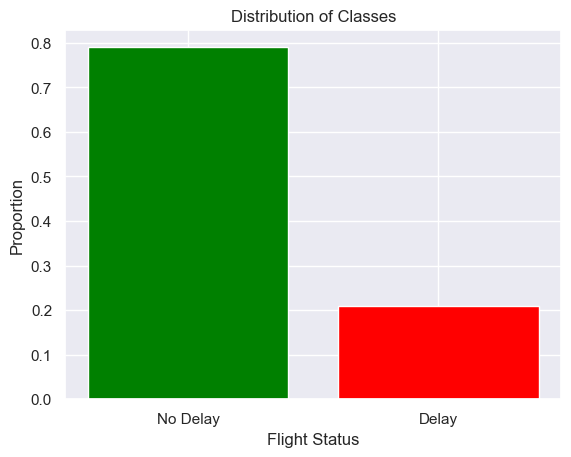

Delay count: 343332
No delay count: 1292258
Ratio of delayed flights to non-delayed flights: 3.7638728694092016


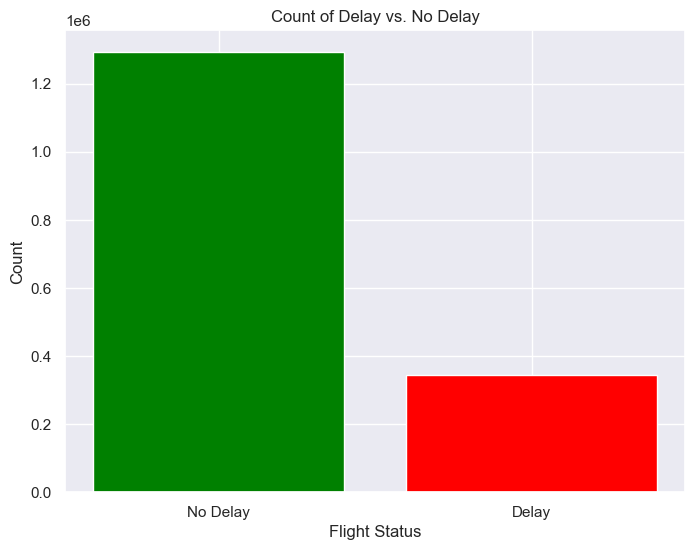

In [ ]:
# To Groupby 'is_delay' and to calculate proportions
delay_proportions = (data.groupby('is_delay').size() / len(data)).reset_index(name='Proportion')

# Creating a bar plot
plt.bar(delay_proportions['is_delay'], delay_proportions['Proportion'], color=['green', 'red'])
plt.xlabel('Flight Status')
plt.ylabel('Proportion')
plt.title('Distribution of Classes')
plt.xticks([0, 1], ['No Delay', 'Delay'])  # Set custom x-axis labels with clearer names
plt.show()

# Counting the number of delays and no delays
delay_count = data['is_delay'].value_counts()[1]  # Count of delays (1)
no_delay_count = data['is_delay'].value_counts()[0]  # Count of no delays (0)

# To store the counts in variables
print(f"Delay count: {delay_count}")
print(f"No delay count: {no_delay_count}")
# To calculate the ratio between no delay and delay
delay_ratio = no_delay_count / delay_count
print("Ratio of delayed flights to non-delayed flights:", delay_ratio)

# Creating a bar plot
plt.figure(figsize=(8, 6))
plt.bar(['No Delay', 'Delay'], [no_delay_count, delay_count], color=['green', 'red'])
plt.xlabel('Flight Status')
plt.ylabel('Count')
plt.title('Count of Delay vs. No Delay')
plt.show()


**Question**: What can you deduce from the bar plot about the ratio of delay vs. no delay?

**Deduction from BarPlot:**

From calculation, we can say that for every one incident of 'delay', we have 3.7638728694092016 'no delay'. It means after every 
'3.7638728694092016' times being on schedule, there is one occurance of 'delay'. The Frequency bar shows that the relation between 'no delay' and 'delay' is *0.79:0.21* approximately.

**Questions**: 

- Which months have the most delays?
- What time of the day has the most delays?
- What day of the week has the most delays?
- Which airline has the most delays?
- Which origin and destination airports have the most delays?
- Is flight distance a factor in the delays?

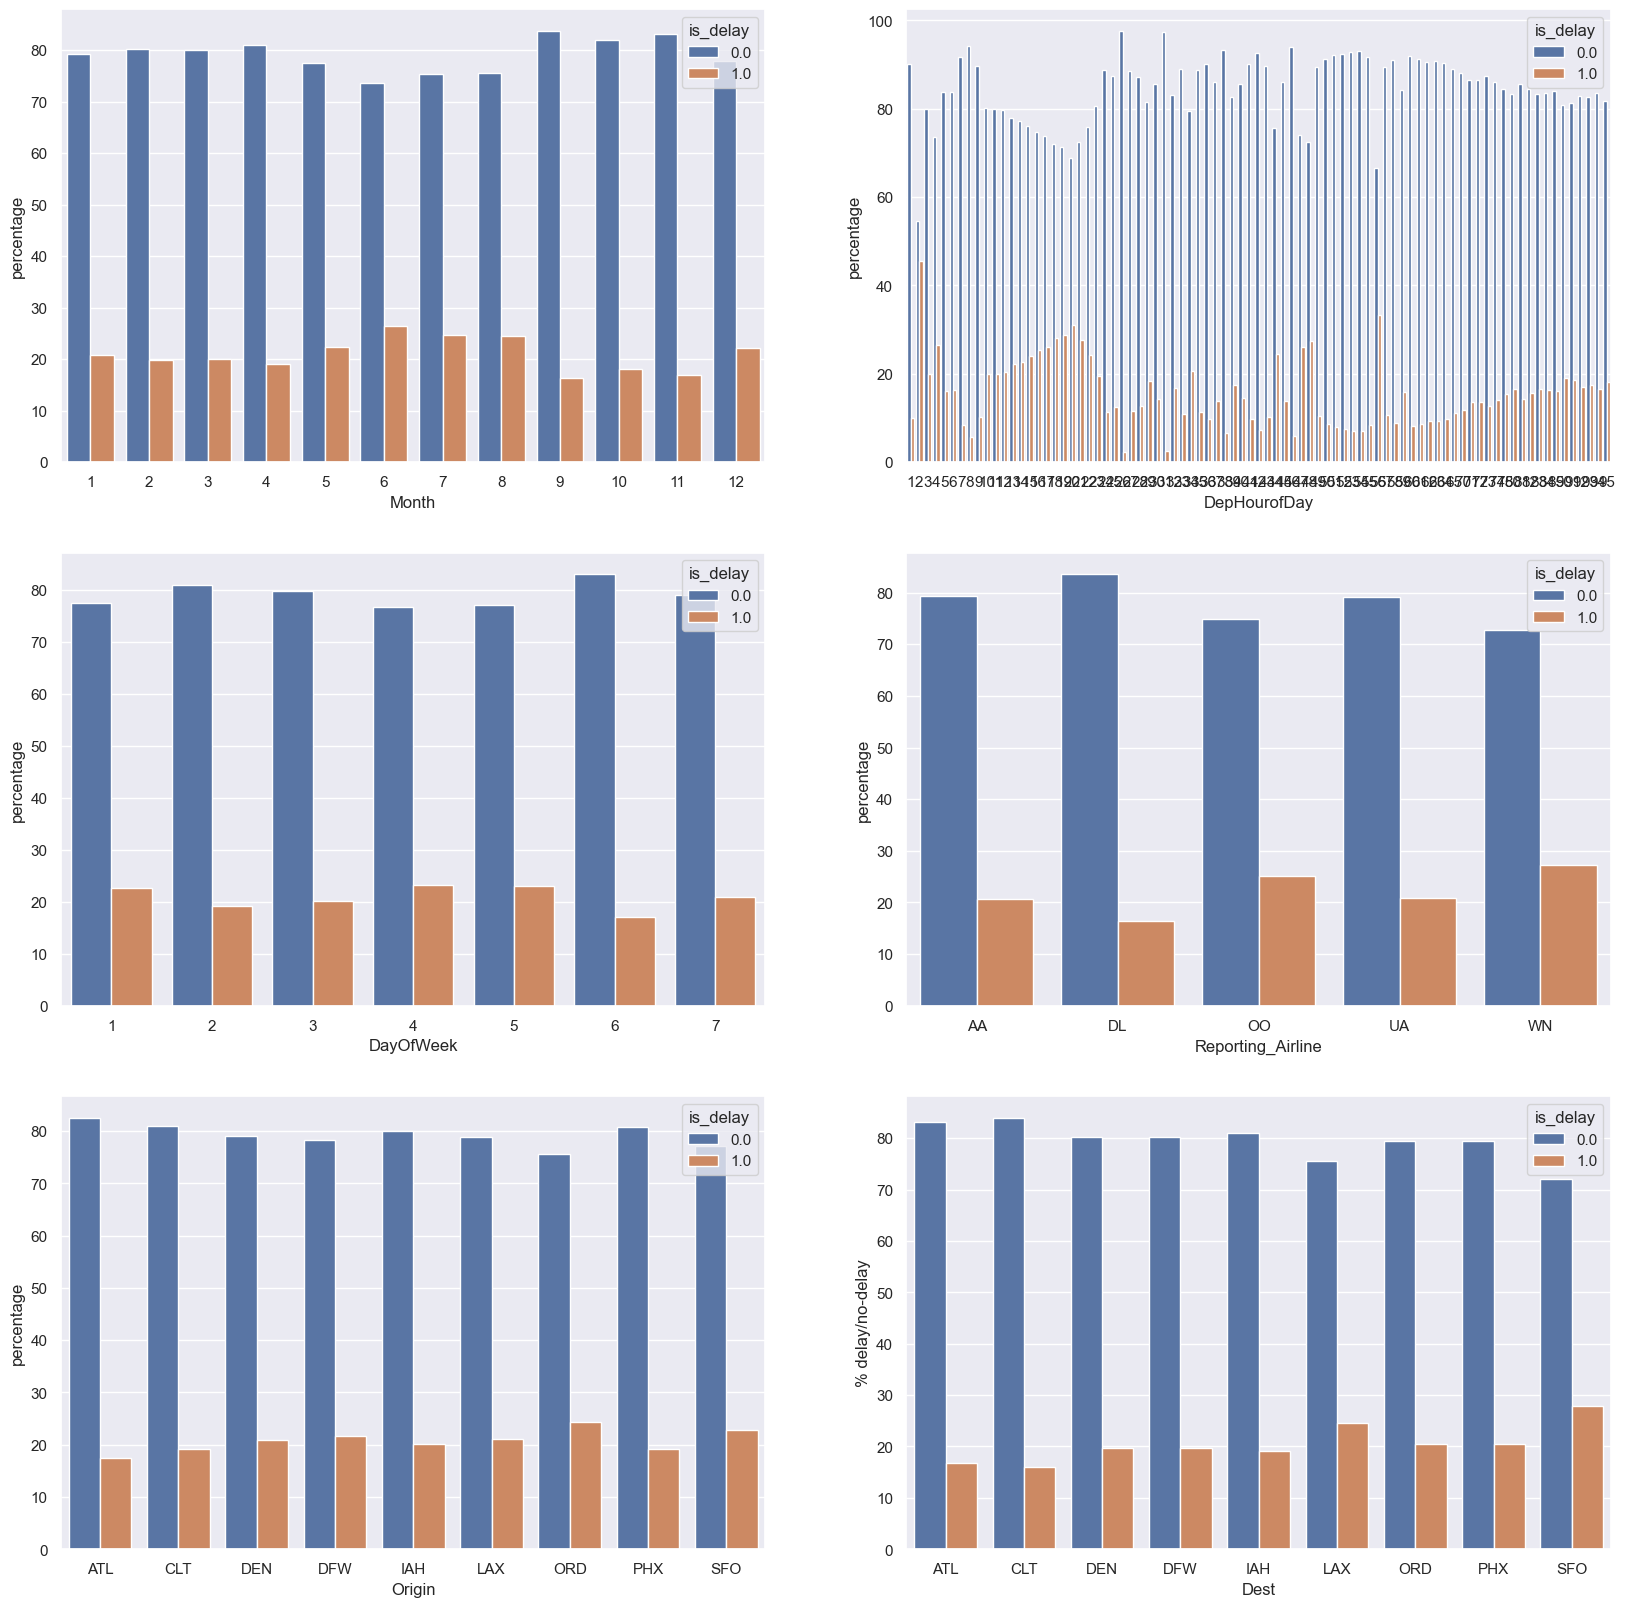

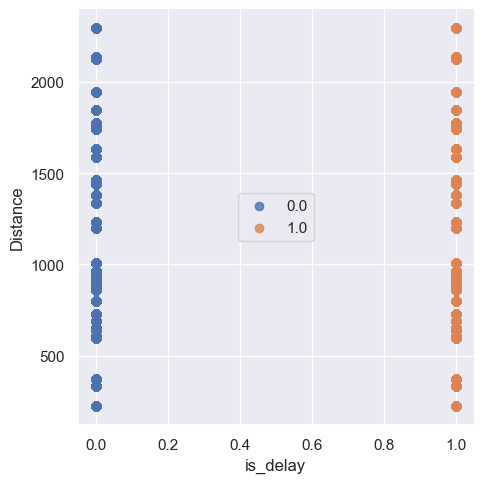

In [ ]:
# Grouping the columns for visualisation
viz_columns = ['Month', 'DepHourofDay', 'DayOfWeek', 'Reporting_Airline', 'Origin', 'Dest']
fig, axes = plt.subplots(3, 2, figsize=(20,20), squeeze=False)
# fig.autofmt_xdate(rotation=90)

# Plotting bar graph with percentage of 'is delay' and it's opposite
for idx, column in enumerate(viz_columns):
    ax = axes[idx//2, idx%2]
    temp = data.groupby(column)['is_delay'].value_counts(normalize=True).rename('percentage').\
    mul(100).reset_index().sort_values(column)
    sns.barplot(x=column, y="percentage", hue="is_delay", data=temp, ax=ax)
    plt.ylabel('% delay/no-delay')
    

plt.show()

# Plotting scatter plot for no delay
sns.lmplot( x="is_delay", y="Distance", data=data, fit_reg=False, hue='is_delay', legend=False)
plt.legend(loc='center')
plt.xlabel('is_delay')
plt.ylabel('Distance')
plt.show()

<Figure size 1200x600 with 0 Axes>

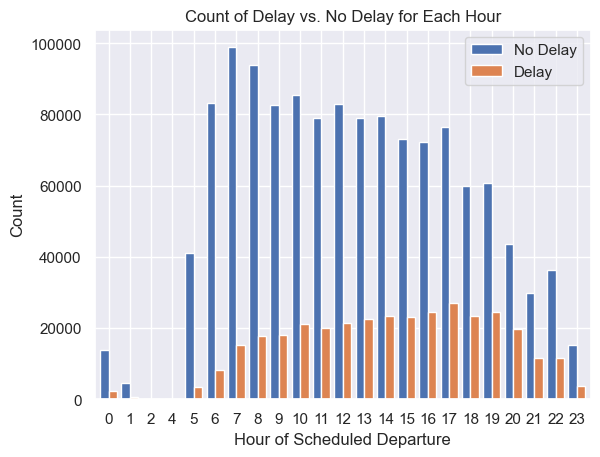

In [ ]:
# To Group by 'CRSDepHour' and 'is_delay', then count occurrences
data['CRSDepTime'] = data['CRSDepTime'].astype(str).str.zfill(4)  # Padding zero if needed
data['Hour'] = data['CRSDepTime'].str[:2].astype(int)  # selecting 1st two rows as HH

# To Count the delay and no delay for each hour
hourly_delay_counts = data.groupby(['Hour', 'is_delay']).size().unstack(fill_value=0)

# Plotting the BarPlot by Hour
plt.figure(figsize=(12, 6))
hourly_delay_counts.plot(kind='bar', stacked=False, width=0.8)
plt.xlabel('Hour of Scheduled Departure')
plt.ylabel('Count')
plt.title('Count of Delay vs. No Delay for Each Hour')
plt.legend(['No Delay', 'Delay'])
plt.xticks(rotation=0)
plt.show()

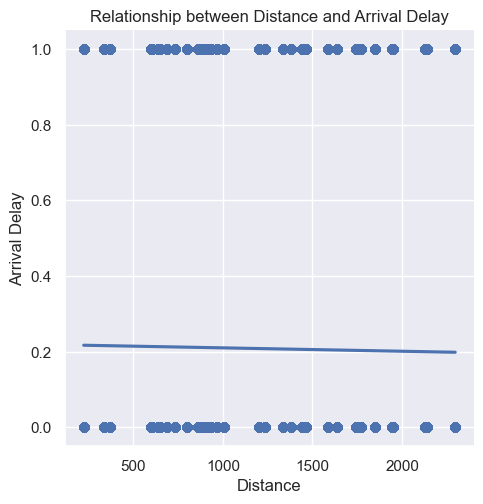

In [86]:
# Scatterplot of relation between Distance and delay
sns.lmplot(x="Distance", y="is_delay", data=data)
plt.xlabel("Distance")
plt.ylabel("Arrival Delay")
plt.title("Relationship between Distance and Arrival Delay")
plt.show()

# Explaining the Figues:
There are six bar plots providing number of delay(and no delay) by percentages across various factors like month, departure hour, day of the week, airline, origin, and destination. It is seen that month of 6(June) and 1st,4th and 5th day of weeks encounters most delays. Also 17:00 hours has the most occurance of delay and considerable amount of delay recorded in between 16:00-20:00 hours. Amongst the Airliners **WN**(Southwest Airlines) has most arrival delay. As for the airports, **ORD** (Chicago) has most delays as Origin, with **SFO**(San Francisco) is the 2nd and **SFO**(San Francisco) has most delays as destination. There is delay from **LAX**(Los Angeles) in around 22% of time.

From Scatter plot, we see relationship between distance and delay, we can say there are no significant correlation between increase of delay with distance. Regression line showed a negligible negative relation between delay and distance.



### Features

Look at all the columns and what their specific types are.

In [89]:
print(data.dtypes)

# counts of each data types
data_types = data.dtypes.value_counts()
print(data_types)

Year                   int64
Quarter                int64
Month                  int64
DayofMonth             int64
DayOfWeek              int64
FlightDate            object
Reporting_Airline     object
Origin                object
OriginState           object
Dest                  object
DestState             object
CRSDepTime            object
Cancelled            float64
Diverted             float64
Distance             float64
DistanceGroup          int64
ArrDelay             float64
ArrDelayMinutes      float64
is_delay             float64
AirTime              float64
DepHourofDay           int64
DepHour                int64
CRSDepHour             int64
Hour                   int64
dtype: object
int64      10
object      7
float64     7
Name: count, dtype: int64


Filtering the required columns:
- Date is redundant, because you have Year, Quarter, Month, DayofMonth, and DayOfWeek to describe the date.
- Use Origin and Dest codes instead of OriginState and DestState.
- Because you are just classifying whether the flight is delayed or not, you don't need TotalDelayMinutes, DepDelayMinutes, and ArrDelayMinutes.

Treat DepHourofDay as a categorical variable because it doesn't have any quantitative relation with the target.
- If you had to do a one-hot encoding of it, it would result in 23 more columns.
- Other alternatives to handling categorical variables include hash encoding, regularized mean encoding, and bucketizing the values, among others.
- Just split into buckets here.

**Hint**: To change a column type to category, use the `astype` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.astype.html)).

In [ ]:
# For creating a copy of the original DataFrame
data_orig = data.copy()

# Selection of relevant columns
data = data[['is_delay', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 
              'Reporting_Airline', 'Origin', 'Dest', 'Distance', 'DepHourofDay']]

# Conversion of categorical columns to categorical data type
categorical_columns = ['Quarter', 'Month', 'DayOfWeek', 'Reporting_Airline', 'Origin', 'Dest', 'DepHourofDay']
for c in categorical_columns:
    data[c] = data[c].astype('category')

To use one-hot encoding, use the Pandas `get_dummies` function for the categorical columns that you selected above. Then, you can concatenate those generated features to your original dataset using the Pandas `concat` function. For encoding categorical variables, you can also use *dummy encoding* by using a keyword `drop_first=True`. For more information on dummy encoding, see https://en.wikiversity.org/wiki/Dummy_variable_(statistics).

For example:
```
pd.get_dummies(df[['column1','columns2']], drop_first=True)
```

In [ ]:
# Getting dummies for one-hot encoding
data_dummies = pd.get_dummies(data[categorical_columns], drop_first=True) 
data = pd.concat([data, data_dummies], axis = 1)
data.drop(categorical_columns,axis=1, inplace=True)

Check the length of the dataset and the new columns

In [92]:
# To check dataset length and new columns(dummy)
print("Length of the dataset:", len(data))
print("New columns added:", data_dummies.columns)

Length of the dataset: 1635590
New columns added: Index(['Quarter_2', 'Quarter_3', 'Quarter_4', 'Month_2', 'Month_3', 'Month_4',
       'Month_5', 'Month_6', 'Month_7', 'Month_8',
       ...
       'DepHourofDay_82', 'DepHourofDay_83', 'DepHourofDay_84',
       'DepHourofDay_85', 'DepHourofDay_90', 'DepHourofDay_91',
       'DepHourofDay_92', 'DepHourofDay_93', 'DepHourofDay_94',
       'DepHourofDay_95'],
      dtype='object', length=122)


**Sample Answer:** 
```
Index(['Distance', 'is_delay', 'Quarter_2', 'Quarter_3', 'Quarter_4',
       'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6', 'Month_7',
       'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12',
       'DayofMonth_2', 'DayofMonth_3', 'DayofMonth_4', 'DayofMonth_5',
       'DayofMonth_6', 'DayofMonth_7', 'DayofMonth_8', 'DayofMonth_9',
       'DayofMonth_10', 'DayofMonth_11', 'DayofMonth_12', 'DayofMonth_13',
       'DayofMonth_14', 'DayofMonth_15', 'DayofMonth_16', 'DayofMonth_17',
       'DayofMonth_18', 'DayofMonth_19', 'DayofMonth_20', 'DayofMonth_21',
       'DayofMonth_22', 'DayofMonth_23', 'DayofMonth_24', 'DayofMonth_25',
       'DayofMonth_26', 'DayofMonth_27', 'DayofMonth_28', 'DayofMonth_29',
       'DayofMonth_30', 'DayofMonth_31', 'DayOfWeek_2', 'DayOfWeek_3',
       'DayOfWeek_4', 'DayOfWeek_5', 'DayOfWeek_6', 'DayOfWeek_7',
       'Reporting_Airline_DL', 'Reporting_Airline_OO', 'Reporting_Airline_UA',
       'Reporting_Airline_WN', 'Origin_CLT', 'Origin_DEN', 'Origin_DFW',
       'Origin_IAH', 'Origin_LAX', 'Origin_ORD', 'Origin_PHX', 'Origin_SFO',
       'Dest_CLT', 'Dest_DEN', 'Dest_DFW', 'Dest_IAH', 'Dest_LAX', 'Dest_ORD',
       'Dest_PHX', 'Dest_SFO'],
      dtype='object')
```

Now you are ready to do model training. Before splitting the data, rename the column `is_delay` to `target`.

**Hint**: You can use the Pandas `rename` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html)).

In [93]:
# Renaming `is_delay` to `target`
data.rename(columns = {'is_delay': 'target'}, inplace=True )

In [94]:
# Saving the combined csv file (combined_csv_v1.csv) to local server/computer
data.to_csv('combined_csv_v1.csv', index=False)

# Step 3: Model training and evaluation

1. Split the data into `train_data`, and `test_data` using `sklearn.model_selection.train_test_split`.  
2. Build a logistic regression model for the data, where training data is 80%, and test data is 20%.

Use the following cells to complete these steps. Insert and delete cells where needed.


### Train test split

In [4]:
data_v1 = pd.read_csv('combined_csv_v1.csv')

In [9]:
# Loading Libraries for Logistics Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Spliting of data
train_data, test_data = train_test_split(data_v1, test_size=0.2, random_state=42)

# Separation of features and target variables
X_train = train_data.drop(columns='target')
y_train = train_data['target']
X_test = test_data.drop(columns='target')
y_test = test_data['target']

# Building Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Prediction on test data
y_pred = model.predict(X_test)

# To evaluate model through accuracy and classification report
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy:{accuracy}")
print("Classification Report:\n", class_report)



Accuracy:0.7901216074933205
Classification Report:
               precision    recall  f1-score   support

         0.0       0.79      1.00      0.88    258421
         1.0       0.57      0.00      0.01     68697

    accuracy                           0.79    327118
   macro avg       0.68      0.50      0.44    327118
weighted avg       0.74      0.79      0.70    327118



**Evaluation of Model:**
It shows an imbalanced performance. The model has a high precision (0.79) and recall (1.00) for class 0 (no delay), meaning it’s very accurate at predicting instances of class 0. On the contrary, for class 1 (delay), the model performs poorly, with a low precision (0.57) and almost no recall (0.00). Meaning it rarely identifies delay (class 1) correctly.

In [ ]:
# Loading Libraries for random forest
from sklearn.ensemble import RandomForestClassifier

# Splitting the data
X = data_v1.drop(columns=['target'])
y = data_v1['target']
train_data, test_data, train_labels, test_labels = train_test_split(X, y, test_size=0.2, random_state=42)

# Defining RandomForest with parametres limited
rf_model = RandomForestClassifier(
    n_estimators=100, 
    max_depth=15,            
    max_features='sqrt',    
    class_weight='balanced',
    n_jobs=2,               
    random_state=42
)

# Training the model
rf_model.fit(train_data, train_labels)

# Making predictions on the test set
test_predictions = rf_model.predict(test_data)

# Evaluating the model
print("Accuracy:", accuracy_score(test_labels, test_predictions))
print("Classification Report:")
print(classification_report(test_labels, test_predictions))


Accuracy: 0.6360334802731736
Classification Report:
              precision    recall  f1-score   support

         0.0       0.85      0.66      0.74    258421
         1.0       0.30      0.56      0.39     68697

    accuracy                           0.64    327118
   macro avg       0.57      0.61      0.57    327118
weighted avg       0.73      0.64      0.67    327118



**Random Forrest Model Evaluation:**
Due to large dataset and robust RF parametres but limited memory capacity, the parametres were optimized. However it showed poor accuracy and misclassifying on delay(0.66 recall). It showed increased performance for class 1 (delay) but not significant. 

### Baseline classification model

In [ ]:
# Loading Libraries
from sklearn.dummy import DummyClassifier

# Splitting the dataset in training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating a DummyClassifier ()'most_frequent')
baseline_model = DummyClassifier(strategy='most_frequent')
baseline_model.fit(X_train, y_train)

# Prediction and evaluation
y_pred = baseline_model.predict(X_test)
baseline_acc = accuracy_score(y_test, y_pred)

print(f'Baseline model accuracy: {baseline_acc}')


Baseline model accuracy: 0.7899932134581404


**Evaluation of Baseline results:**

From the accuracy results we can see that model correctly predicted the target class in 79% cases approximately. From visualisation of data we have also seen that there is class 0 in approxiately 79% observation. However, from logistic regression evaluation results we observed accurate class 0 prediction with 1.00 recall but no significant identification of class 1 (delay). So the 79% accuracy is only captured for class 0 (no delay).

## Model evaluation
In this section, you'll evaluate your trained model on test data and report on the following metrics:
* Confusion Matrix plot
* Plot the ROC
* Report statistics such as Accuracy, Percision, Recall, Sensitivity and Specificity

To view a plot of the confusion matrix, and various scoring metrics, create a couple of functions:

To plot the confusion matrix, call the `plot_confusion_matrix` function on the `test_labels` and `target_predicted` data from your batch job:

[[258421      0]
 [ 68697      0]]


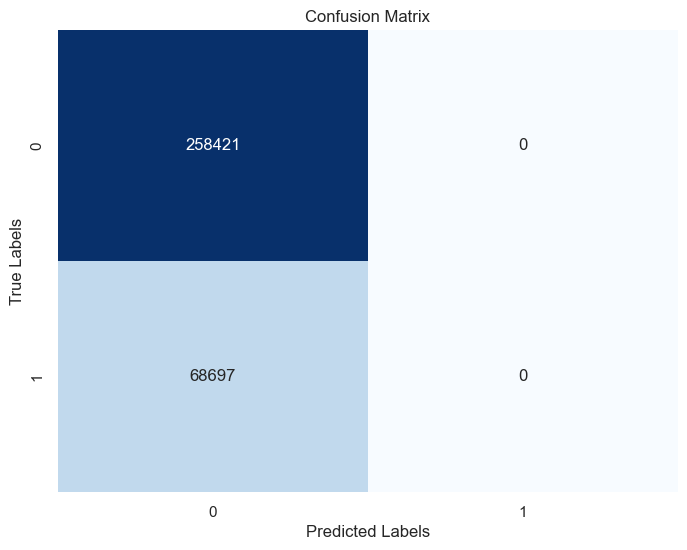

In [23]:
# Loading Libraries
from sklearn.metrics import confusion_matrix

# Defining confusion matrix
def plot_confusion_matrix(test_labels, target_predicted):
    # To Compute the confusion matrix
    cm = confusion_matrix(test_labels, target_predicted)
    
    # To Create a heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    
    # To Add labels and title
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

# Plotting confusion matrix
print(confusion_matrix(y_test,y_pred))
plot_confusion_matrix(y_test, y_pred)


To print statistics and plot an ROC curve, call the `plot_roc` function on the `test_labels` and `target_predicted` data from your batch job:

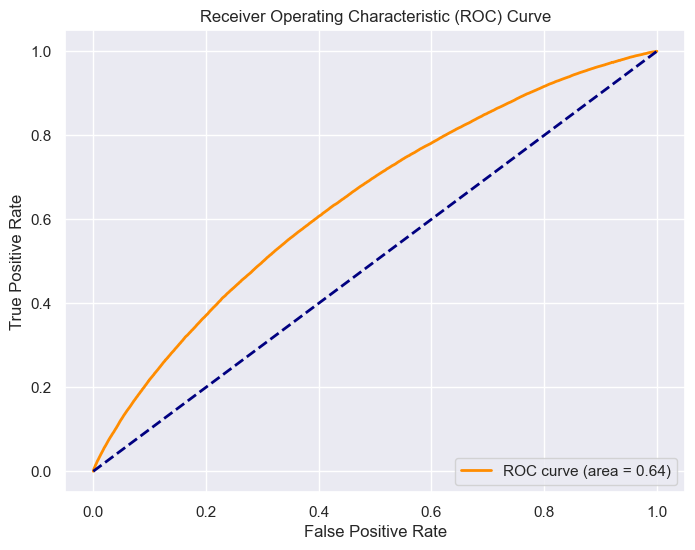

In [18]:
from sklearn.metrics import roc_curve, auc

# Defining ROC plot and tests and targets
def plot_roc_curve(test_labels, target_predicted):
    # To Calculate the false positive rate, true positive rate, and threshold
    fpr, tpr, thresholds = roc_curve(test_labels, target_predicted)
    
    # To Calculate the Area Under the Curve (AUC)
    roc_auc = auc(fpr, tpr)
    
    # Plotting the ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line for random guess
    
    # Adding labels and title
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

# Exploring ROC curve
target_probabilities = model.predict_proba(X_test)[:, 1]
plot_roc_curve(y_test, target_probabilities)


In [ ]:
# Statistical Report

# Loading Libraries
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix

# Calculating the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Extracting true negatives, false positives, false negatives, true positives
tn, fp, fn, tp = cm.ravel()

# Calculating metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)  
specificity = tn / (tn + fp)  

# Print of statistical measures
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall (Sensitivity): {recall:.4f}")
print(f"Specificity: {specificity:.4f}")

# Display of classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7900
Precision: 0.0000
Recall (Sensitivity): 0.0000
Specificity: 1.0000

Classification Report:
               precision    recall  f1-score   support

         0.0       0.79      1.00      0.88    258421
         1.0       0.00      0.00      0.00     68697

    accuracy                           0.79    327118
   macro avg       0.39      0.50      0.44    327118
weighted avg       0.62      0.79      0.70    327118



In [21]:
# Evaluation between test and training set with confusion matrix and other statistical measures

# Loading Necessary Libraries
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

# Predictting on training and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Confusion matrix for training and test sets
train_cm = confusion_matrix(y_train, y_train_pred)
test_cm = confusion_matrix(y_test, y_test_pred)

# Accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Precision
train_precision = precision_score(y_train, y_train_pred)
test_precision = precision_score(y_test, y_test_pred)

# Recall (Sensitivity)
train_recall = recall_score(y_train, y_train_pred)
test_recall = recall_score(y_test, y_test_pred)

# Specificity
train_specificity = train_cm[0, 0] / (train_cm[0, 0] + train_cm[0, 1])
test_specificity = test_cm[0, 0] / (test_cm[0, 0] + test_cm[0, 1])

# Display results for training set
print("Training Set Performance:")
print(f"Confusion Matrix:\n{train_cm}")
print(f"Accuracy: {train_accuracy:.2f}")
print(f"Precision: {train_precision:.2f}")
print(f"Recall (Sensitivity): {train_recall:.2f}")
print(f"Specificity: {train_specificity:.2f}")

# Display results for test set
print("\nTest Set Performance:")
print(f"Confusion Matrix:\n{test_cm}")
print(f"Accuracy: {test_accuracy:.2f}")
print(f"Precision: {test_precision:.2f}")
print(f"Recall (Sensitivity): {test_recall:.2f}")
print(f"Specificity: {test_specificity:.2f}")


Training Set Performance:
Confusion Matrix:
[[1033262     575]
 [ 273915     720]]
Accuracy: 0.79
Precision: 0.56
Recall (Sensitivity): 0.00
Specificity: 1.00

Test Set Performance:
Confusion Matrix:
[[258282    139]
 [ 68516    181]]
Accuracy: 0.79
Precision: 0.57
Recall (Sensitivity): 0.00
Specificity: 1.00


### Key questions to consider:
1. How does your model's performance on the test set compare to the training set? What can you deduce from this comparison? 

2. Are there obvious differences between the outcomes of metrics like accuracy, precision, and recall? If so, why might you be seeing those differences? 

3. Is the outcome for the metric(s) you consider most important sufficient for what you need from a business standpoint? If not, what are some things you might change in your next iteration (in the feature engineering section, which is coming up next)? 

Use the cells below to answer these and other questions. Insert and delete cells where needed.


**Question**: What can you summarize from the confusion matrix?


**Confusion Matrix Report:**

It has given 258,421 cases of correct prediction as 0 (non-delay). However, there were 68,697 cases of incorrect prediction as 0 (non-delay) when they were actually 1 (delay). Such results indicates a significant problem with the model’s performance, specifically with its handling of class 1 (delay)

**AUC-ROC Interpretation**

AUC score of 0.64 indicates that the probability of choosing positive is slightly higher. But for an acceptable model, the AUC score should be much higher. The model is picking up on some patterns but it is not acceptable enough.

**Statistical Reports:**

The model is highly accurate overall but fails to predict the class 1 (delay). It is understandable because class 0 (no delay) has outnumbered class 1 by ratio 0:79:0.21(approximately). In this case, the model is biased towards predicting the majority class 0  and neglecting the minority class 1

**Decision Based on outcome of the Evaluation Matrice:**

The result is dissatisfactory, because the model has not able to predict class 1 (delay) with almost zero accuracy. Therefore this model is not effective for delay prediction. When a dataset has vast difference between two classes, it is suggested to opt for other models, i,e SMOTE (Synthetic Minority Over-sampling Technique). 
> **Ref:** https://www.sciencedirect.com/science/article/abs/pii/S0020025519306838

**Differences in Metrics Results:**

*Accuracy* refer to Proportion of total correct predictions in relation to total number of prediction. In this modeling, due to class imbalance such accuracy (0.79) is misguiding. It has correctly predicted majority class 0 (no delay) with maximum accuracy but failed predict almost all of the minority class 1 (no delay)

*Precsion* and *Recall* is zero for class 1 meaning model predicted class 1 incorrectly every time and model failed to identify any instances of class 1. For class 0, it was 0.79 and 0.88 respectively.

**Comparison Training & Testing Set:**

In Both cases, we see similar performance metrics, with accuracy around 0.79, precision slightly higher in the test set. However, recall remains at 0.00 for both sets, indicating the model fails to identify class 1.

# Step 4: Deployment

1. In this step you are required to push your source code and requirements file to a GitLab repository without the data files. Please use the Git commands to complete this task
2- Create a “readme.md” markdown file that describes the code of this repository and how to run it and what the user would expect if got the code running.

In the cell below provide the link of the pushed repository on your GitLab account.


**GitHub Link:**
https://github.com/IR973AA/final-project-u3267686-part-A.git

# Iteration II

# Step 5: Feature engineering

You've now gone through one iteration of training and evaluating your model. Given that the outcome you reached for your model the first time probably wasn't sufficient for solving your business problem, what are some things you could change about your data to possibly improve model performance?

### Key questions to consider:
1. How might the balance of your two main classes (delay and no delay) impact model performance?
2. Do you have any features that are correlated?
3. Are there feature reduction techniques you could perform at this stage that might have a positive impact on model performance? 
4. Can you think of adding some more data/datasets?
4. After performing some feature engineering, how does your model performance compare to the first iteration?

Use the cells below to perform specific feature engineering techniques (per the questions above) that you think could improve your model performance. Insert and delete cells where needed.


#### Add more features

1. Holidays
2. Weather

**Important Considerations:**

Due to massive imbalance between two classes, class 0 outnumbering class 1, it is unlikely that adding more features would improve the prediction parametres for class 1.

Because the list of holidays from 2014 to 2018 is known, you can create an indicator variable **is_holiday** to mark these.
The hypothesis is that airplane delays could be higher during holidays compared to the rest of the days. Add a boolean variable `is_holiday` that includes the holidays for the years 2014-2018.

In [25]:
# Source: http://www.calendarpedia.com/holidays/federal-holidays-2014.html

import pandas as pd

# List of holiday dates
holidays_14 = ['2014-01-01',  '2014-01-20', '2014-02-17', '2014-05-26', '2014-07-04', '2014-09-01', '2014-10-13', '2014-11-11', '2014-11-27', '2014-12-25']
holidays_15 = ['2015-01-01',  '2015-01-19', '2015-02-16', '2015-05-25', '2015-06-03', '2015-07-04', '2015-09-07', '2015-10-12', '2015-11-11', '2015-11-26', '2015-12-25']
holidays_16 = ['2016-01-01',  '2016-01-18', '2016-02-15', '2016-05-30', '2016-07-04', '2016-09-05', '2016-10-10', '2016-11-11', '2016-11-24', '2016-12-25', '2016-12-26']
holidays_17 = ['2017-01-02', '2017-01-16', '2017-02-20', '2017-05-29', '2017-07-04', '2017-09-04', '2017-10-09', '2017-11-10', '2017-11-23', '2017-12-25']
holidays_18 = ['2018-01-01', '2018-01-15', '2018-02-19', '2018-05-28', '2018-07-04', '2018-09-03', '2018-10-08', '2018-11-12', '2018-11-22', '2018-12-25']
holidays = holidays_14 + holidays_15 + holidays_16 + holidays_17 + holidays_18

# Convert holidays list to datetime
holidays = pd.to_datetime(holidays)

# Load data and ensure 'FlightDate' is in datetime format
data_orig = pd.read_csv('combined_data.csv')
data_orig['FlightDate'] = pd.to_datetime(data_orig['FlightDate'])

# Add 'is_holiday' column where True if FlightDate is in the holiday list, else False
data_orig['is_holiday'] = data_orig['FlightDate'].isin(holidays)

# Display the first few rows to confirm
print(data_orig[['FlightDate', 'is_holiday']].head())


  FlightDate  is_holiday
0 2014-01-26       False
1 2014-01-26       False
2 2014-01-26       False
3 2014-01-26       False
4 2014-01-26       False


Weather data was fetched from https://www.ncei.noaa.gov/access/services/data/v1?dataset=daily-summaries&stations=USW00023174,USW00012960,USW00003017,USW00094846,USW00013874,USW00023234,USW00003927,USW00023183,USW00013881&dataTypes=AWND,PRCP,SNOW,SNWD,TAVG,TMIN,TMAX&startDate=2014-01-01&endDate=2018-12-31.
<br>

This dataset has information on wind speed, precipitation, snow, and temperature for cities by their airport codes.

**Question**: Could bad weather due to rains, heavy winds, or snow lead to airplane delay? Let's check!

> downloaded data from the link above and placed it into the parent folder

Import weather data prepared for the airport codes in our dataset. Use the stations and airports below for the analysis, and create a new column called `airport` that maps the weather station to the airport name.

In [14]:
# Loading the weather data
weather = pd.read_csv('daily-summaries-2024-11-04T09-15-20.csv')  # Adjust the file path if necessary

# Defining the stations and airports lists
station = ['USW00023174', 'USW00012960', 'USW00003017', 'USW00094846',
           'USW00013874', 'USW00023234', 'USW00003927', 'USW00023183', 'USW00013881'] 
airports = ['LAX', 'IAH', 'DEN', 'ORD', 'ATL', 'SFO', 'DFW', 'PHX', 'CLT']

# Creating a mapping dictionary
station_map = dict(zip(station, airports))

# Map of the weather stations to airports and create a new column 'airport'
weather['airport'] = weather['STATION'].map(station_map)

# Display of the first few rows to confirm the mapping
weather.head()

,STATION,DATE,AWND,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,airport
0,USW00023174,2014-01-01,16,0,NaN,NaN,131.0,178.0,78.0,LAX
1,USW00023174,2014-01-02,22,0,NaN,NaN,159.0,256.0,100.0,LAX
2,USW00023174,2014-01-03,17,0,NaN,NaN,140.0,178.0,83.0,LAX
3,USW00023174,2014-01-04,18,0,NaN,NaN,136.0,183.0,100.0,LAX
4,USW00023174,2014-01-05,18,0,NaN,NaN,151.0,244.0,83.0,LAX


Create another column called `MONTH` from the `DATE` column.

In [15]:
# Getting month from DATE
weather['MONTH'] = weather['DATE'].apply(lambda x: x.split('-')[1])
weather.head()


,STATION,DATE,AWND,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,airport,MONTH
0,USW00023174,2014-01-01,16,0,NaN,NaN,131.0,178.0,78.0,LAX,01
1,USW00023174,2014-01-02,22,0,NaN,NaN,159.0,256.0,100.0,LAX,01
2,USW00023174,2014-01-03,17,0,NaN,NaN,140.0,178.0,83.0,LAX,01
3,USW00023174,2014-01-04,18,0,NaN,NaN,136.0,183.0,100.0,LAX,01
4,USW00023174,2014-01-05,18,0,NaN,NaN,151.0,244.0,83.0,LAX,01


### Sample output
```
  STATION     DATE      AWND PRCP SNOW SNWD TAVG TMAX  TMIN airport MONTH
0 USW00023174 2014-01-01 16   0   NaN  NaN 131.0 178.0 78.0  LAX    01
1 USW00023174 2014-01-02 22   0   NaN  NaN 159.0 256.0 100.0 LAX    01
2 USW00023174 2014-01-03 17   0   NaN  NaN 140.0 178.0 83.0  LAX    01
3 USW00023174 2014-01-04 18   0   NaN  NaN 136.0 183.0 100.0 LAX    01
4 USW00023174 2014-01-05 18   0   NaN  NaN 151.0 244.0 83.0  LAX    01
```

Analyze and handle the `SNOW` and `SNWD` columns for missing values using `fillna()`. Use the `isna()` function to check the missing values for all the columns.

In [16]:
# Filling missing values for 'SNOW' and 'SNWD' with 0
weather['SNOW'].fillna(0, inplace=True)
weather['SNWD'].fillna(0, inplace=True)

# To Check for remaining missing values in all columns
missing_values = weather.isna().sum()
print(missing_values)


STATION     0
DATE        0
AWND        0
PRCP        0
SNOW        0
SNWD        0
TAVG       62
TMAX       20
TMIN       20
airport     0
MONTH       0
dtype: int64


**Question**: Print the index of the rows that have missing values for TAVG, TMAX, TMIN.

**Hint**: Use the `isna()` function to find the rows that are missing, and then use the list on the idx variable to get the index.

In [17]:
# Getting the rows with missing values for 'TAVG', 'TMAX', and 'TMIN'
TAVG_idx = np.where(weather['TAVG'].isna())[0]
TMAX_idx = np.where(weather['TMAX'].isna())[0]
TMIN_idx = np.where(weather['TMIN'].isna())[0]

# Print of the indices
print("Indices with missing TAVG values:", TAVG_idx)
print("Indices with missing TMAX values:", TMAX_idx)
print("Indices with missing TMIN values:", TMIN_idx)


Indices with missing TAVG values: [ 3956  3957  3958  3959  3960  3961  3962  3963  3964  3965  3966  3967
  3968  3969  3970  3971  3972  3973  3974  3975  3976  3977  3978  3979
  3980  3981  3982  3983  3984  3985  4017  4018  4019  4020  4021  4022
  4023  4024  4025  4026  4027  4028  4029  4030  4031  4032  4033  4034
  4035  4036  4037  4038  4039  4040  4041  4042  4043  4044  4045  4046
  4047 13420]
Indices with missing TMAX values: [10763 10764 10765 10766 10767 10768 10769 10770 10771 10772 10773 10774
 10775 10776 10777 10778 10779 10780 10781 10782]
Indices with missing TMIN values: [10763 10764 10765 10766 10767 10768 10769 10770 10771 10772 10773 10774
 10775 10776 10777 10778 10779 10780 10781 10782]


### Sample output

```
array([ 3956,  3957,  3958,  3959,  3960,  3961,  3962,  3963,  3964,
        3965,  3966,  3967,  3968,  3969,  3970,  3971,  3972,  3973,
        3974,  3975,  3976,  3977,  3978,  3979,  3980,  3981,  3982,
        3983,  3984,  3985,  4017,  4018,  4019,  4020,  4021,  4022,
        4023,  4024,  4025,  4026,  4027,  4028,  4029,  4030,  4031,
        4032,  4033,  4034,  4035,  4036,  4037,  4038,  4039,  4040,
        4041,  4042,  4043,  4044,  4045,  4046,  4047, 13420])
```

You can replace the missing TAVG, TMAX, and TMIN with the average value for a particular station/airport. Because the consecutive rows of TAVG_idx are missing, replacing with a previous value would not be possible. Instead, replace it with the mean. Use the `groupby` function to aggregate the variables with a mean value.

In [18]:
# To Group by 'airport' and calculate the mean for 'TAVG', 'TMAX', and 'TMIN'
weather_impute = weather.groupby(['airport']).agg({'TAVG': 'mean', 'TMAX': 'mean', 'TMIN': 'mean'}).reset_index()

# Merging these mean values back to the original weather dataset to fill missing values
weather = weather.merge(weather_impute, on='airport', suffixes=('', '_mean'))

# To Replace missing values in TAVG, TMAX, TMIN with the mean value for that airport
weather['TAVG'].fillna(weather['TAVG_mean'], inplace=True)
weather['TMAX'].fillna(weather['TMAX_mean'], inplace=True)
weather['TMIN'].fillna(weather['TMIN_mean'], inplace=True)

# Dropping the temporary mean columns after imputation
weather.drop(columns=['TAVG_mean', 'TMAX_mean', 'TMIN_mean'], inplace=True)

# To Display first two rows
weather.head(2)


,STATION,DATE,AWND,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,airport,MONTH
0,USW00023174,2014-01-01,16,0,0.0,0.0,131.0,178.0,78.0,LAX,01
1,USW00023174,2014-01-02,22,0,0.0,0.0,159.0,256.0,100.0,LAX,01


Merge the mean data with the weather data.

In [19]:
# Merging the weather data with the imputed mean data
weather = pd.merge(weather, weather_impute, how='left', on=['airport']) \
    .rename(columns={
        'TAVG_y': 'TAVG_AVG',
        'TMAX_y': 'TMAX_AVG',
        'TMIN_y': 'TMIN_AVG',
        'TAVG_x': 'TAVG',
        'TMAX_x': 'TMAX',
        'TMIN_x': 'TMIN'
    })

# To Display first few rows to verify the merge
weather.head()


,STATION,DATE,AWND,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,airport,MONTH,TAVG_AVG,TMAX_AVG,TMIN_AVG
0,USW00023174,2014-01-01,16,0,0.0,0.0,131.0,178.0,78.0,LAX,01,181.254655,224.636364,146.18839
1,USW00023174,2014-01-02,22,0,0.0,0.0,159.0,256.0,100.0,LAX,01,181.254655,224.636364,146.18839
2,USW00023174,2014-01-03,17,0,0.0,0.0,140.0,178.0,83.0,LAX,01,181.254655,224.636364,146.18839
3,USW00023174,2014-01-04,18,0,0.0,0.0,136.0,183.0,100.0,LAX,01,181.254655,224.636364,146.18839
4,USW00023174,2014-01-05,18,0,0.0,0.0,151.0,244.0,83.0,LAX,01,181.254655,224.636364,146.18839


Check for missing values again.

In [20]:
weather.TAVG[TAVG_idx] = weather.TAVG_AVG[TAVG_idx]
weather.TMAX[TMAX_idx] = weather.TMAX_AVG[TMAX_idx]
weather.TMIN[TMIN_idx] = weather.TMIN_AVG[TMIN_idx]
weather.isna().sum()

STATION     0
DATE        0
AWND        0
PRCP        0
SNOW        0
SNWD        0
TAVG        0
TMAX        0
TMIN        0
airport     0
MONTH       0
TAVG_AVG    0
TMAX_AVG    0
TMIN_AVG    0
dtype: int64

Drop `STATION,MONTH,TAVG_AVG,TMAX_AVG,TMIN_AVG,TMAX,TMIN,SNWD` from the dataset

In [21]:
weather.drop(columns=['STATION','MONTH','TAVG_AVG', 'TMAX_AVG', 'TMIN_AVG', 'TMAX' ,'TMIN', 'SNWD'],inplace=True)

In [30]:
weather.head()

,DATE,AWND,PRCP,SNOW,TAVG,airport
0,2014-01-01,16,0,0.0,131.0,LAX
1,2014-01-02,22,0,0.0,159.0,LAX
2,2014-01-03,17,0,0.0,140.0,LAX
3,2014-01-04,18,0,0.0,136.0,LAX
4,2014-01-05,18,0,0.0,151.0,LAX


In [ ]:
data_orig.head()

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,Origin,OriginState,Dest,...,CRSDepTime,Cancelled,Diverted,Distance,DistanceGroup,ArrDelay,ArrDelayMinutes,ArrDel15,AirTime,is_holiday
0,2014,1,1,26,7,2014-01-26,DL,ATL,GA,IAH,...,2145,0.0,0.0,689.0,3,-20.0,0.0,0.0,99.0,False
1,2014,1,1,26,7,2014-01-26,DL,DFW,TX,ATL,...,945,0.0,0.0,731.0,3,-3.0,0.0,0.0,98.0,False
2,2014,1,1,26,7,2014-01-26,DL,ATL,GA,DEN,...,1855,0.0,0.0,1199.0,5,-7.0,0.0,0.0,174.0,False
3,2014,1,1,26,7,2014-01-26,DL,ATL,GA,PHX,...,1634,0.0,0.0,1587.0,7,-4.0,0.0,0.0,233.0,False
4,2014,1,1,26,7,2014-01-26,DL,PHX,AZ,ATL,...,700,0.0,0.0,1587.0,7,-13.0,0.0,0.0,179.0,False


Add the origin and destination weather conditions to the dataset.

In [ ]:
# To ensure 'FlightDate' and 'DATE' are in datetime format
data_orig['FlightDate'] = pd.to_datetime(data_orig['FlightDate'])
weather['DATE'] = pd.to_datetime(weather['DATE'])

# To ensure 'Origin', 'Dest', and 'airport' are in string format
data_orig['Origin'] = data_orig['Origin'].astype(str)
data_orig['Dest'] = data_orig['Dest'].astype(str)
weather['airport'] = weather['airport'].astype(str)

# Merging origin weather conditions
data_orig = pd.merge(data_orig, weather, how='left', 
                     left_on=['FlightDate', 'Origin'], 
                     right_on=['DATE', 'airport']) \
              .rename(columns={'AWND': 'AWND_O', 'PRCP': 'PRCP_O', 
                               'TAVG': 'TAVG_O', 'SNOW': 'SNOW_O'}) \
              .drop(columns=['DATE', 'airport'])

# Merging destination weather conditions
data_orig = pd.merge(data_orig, weather, how='left', 
                     left_on=['FlightDate', 'Dest'], 
                     right_on=['DATE', 'airport']) \
              .rename(columns={'AWND': 'AWND_D', 'PRCP': 'PRCP_D', 
                               'TAVG': 'TAVG_D', 'SNOW': 'SNOW_D'}) \
              .drop(columns=['DATE', 'airport'])

# To Display the first few rows to verify the result
print(data_orig.head())



   Year  Quarter  Month  DayofMonth  DayOfWeek FlightDate Reporting_Airline  \
0  2014        1      1          26          7 2014-01-26                DL   
1  2014        1      1          26          7 2014-01-26                DL   
2  2014        1      1          26          7 2014-01-26                DL   
3  2014        1      1          26          7 2014-01-26                DL   
4  2014        1      1          26          7 2014-01-26                DL   

  Origin OriginState Dest  ... AirTime  is_holiday  AWND_O  PRCP_O  SNOW_O  \
0    ATL          GA  IAH  ...    99.0       False      33       0     0.0   
1    DFW          TX  ATL  ...    98.0       False      39       0     0.0   
2    ATL          GA  DEN  ...   174.0       False      33       0     0.0   
3    ATL          GA  PHX  ...   233.0       False      33       0     0.0   
4    PHX          AZ  ATL  ...   179.0       False      20       0     0.0   

   TAVG_O  AWND_D  PRCP_D  SNOW_D  TAVG_D  
0    54.0   

**Note**: It is always a good practice to check nulls/NAs after joins.

In [ ]:
# Ensuring CRSDepTime is a string to extract hour properly
data_orig['CRSDepTime'] = data_orig['CRSDepTime'].astype(str)

# To Extract the hour and convert to integer
data_orig['DepHourofDay'] = data_orig['CRSDepTime'].str[:2].astype(int)

# Display of the first few rows to verify the result
print(data_orig[['CRSDepTime', 'DepHourofDay']].head())

  CRSDepTime  DepHourofDay
0       2145            21
1        945            94
2       1855            18
3       1634            16
4        700            70


In [ ]:
# Display of the count of NA values for each column
na_counts = data_orig.isna().sum()

# Filtering and display of only columns with NA values
na_counts_with_na = na_counts[na_counts > 0]
print(na_counts_with_na)


ArrDelay           22540
ArrDelayMinutes    22540
ArrDel15           22540
AirTime            22540
dtype: int64


In [39]:
# Dropping rows with any NA values
data_orig = data_orig.dropna()

# Check of any remaining NA values
print(data_orig.isna().sum())

Year                 0
Quarter              0
Month                0
DayofMonth           0
DayOfWeek            0
FlightDate           0
Reporting_Airline    0
Origin               0
OriginState          0
Dest                 0
DestState            0
CRSDepTime           0
Cancelled            0
Diverted             0
Distance             0
DistanceGroup        0
ArrDelay             0
ArrDelayMinutes      0
ArrDel15             0
AirTime              0
is_holiday           0
AWND_O               0
PRCP_O               0
SNOW_O               0
TAVG_O               0
AWND_D               0
PRCP_D               0
SNOW_D               0
TAVG_D               0
DepHourofDay         0
dtype: int64


In [40]:
# Renaming of the column 'ArrDel15' to 'is_delay'
data_orig = data_orig.rename(columns={'ArrDel15': 'is_delay'})

In [41]:
data_orig.columns

Index(['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'FlightDate',
       'Reporting_Airline', 'Origin', 'OriginState', 'Dest', 'DestState',
       'CRSDepTime', 'Cancelled', 'Diverted', 'Distance', 'DistanceGroup',
       'ArrDelay', 'ArrDelayMinutes', 'is_delay', 'AirTime', 'is_holiday',
       'AWND_O', 'PRCP_O', 'SNOW_O', 'TAVG_O', 'AWND_D', 'PRCP_D', 'SNOW_D',
       'TAVG_D', 'DepHourofDay'],
      dtype='object')

Convert the categorical data into numerical data using one-hot encoding.

In [ ]:
 # Converting the categorical data into numerical data using one-hot encoding.
data = data_orig.copy()
data = data[['is_delay', 'Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 
       'Reporting_Airline', 'Origin', 'Dest','Distance','DepHourofDay','is_holiday', 'AWND_O', 'PRCP_O',
       'TAVG_O', 'AWND_D', 'PRCP_D', 'TAVG_D', 'SNOW_O', 'SNOW_D']]


categorical_columns  = ['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 
       'Reporting_Airline', 'Origin', 'Dest', 'is_holiday']
for c in categorical_columns:
    data[c] = data[c].astype('category')

In [43]:
# Specify categorical columns for one-hot encoding
categorical_columns = ['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 
                       'Reporting_Airline', 'Origin', 'Dest', 'is_holiday']

# Generate dummy variables for categorical columns, dropping the first to avoid multicollinearity
data_dummies = pd.get_dummies(data[categorical_columns], drop_first=True)

# Concatenate the dummy variables with the original dataframe
data = pd.concat([data, data_dummies], axis=1)

# Drop the original categorical columns
data.drop(columns=categorical_columns, inplace=True)

# Display the updated dataframe to verify changes
print(data.head())


   is_delay  Distance  DepHourofDay  AWND_O  PRCP_O  TAVG_O  AWND_D  PRCP_D  \
0       0.0     689.0            21      33       0    54.0      30       0   
1       0.0     731.0            94      39       0   136.0      33       0   
2       0.0    1199.0            18      33       0    54.0      77       0   
3       0.0    1587.0            16      33       0    54.0      20       0   
4       0.0    1587.0            70      20       0   165.0      33       0   

   TAVG_D  SNOW_O  ...  Origin_SFO  Dest_CLT  Dest_DEN  Dest_DFW  Dest_IAH  \
0   130.0     0.0  ...       False     False     False     False      True   
1    54.0     0.0  ...       False     False     False     False     False   
2    68.0     0.0  ...       False     False      True     False     False   
3   165.0     0.0  ...       False     False     False     False     False   
4    54.0     0.0  ...       False     False     False     False     False   

   Dest_LAX  Dest_ORD  Dest_PHX  Dest_SFO  is_holiday_Tr

### Sample code

```
data_dummies = pd.get_dummies(data[['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'Reporting_Airline', 'Origin', 'Dest', 'is_holiday']], drop_first=True)
data = pd.concat([data, data_dummies], axis = 1)
categorical_columns.remove('is_delay')
data.drop(categorical_columns,axis=1, inplace=True)
```

Check the new columns.

In [47]:
data.columns

Index(['target', 'Distance', 'DepHourofDay', 'AWND_O', 'PRCP_O', 'TAVG_O',
       'AWND_D', 'PRCP_D', 'TAVG_D', 'SNOW_O', 'SNOW_D', 'Year_2015',
       'Year_2016', 'Year_2017', 'Year_2018', 'Quarter_2', 'Quarter_3',
       'Quarter_4', 'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6',
       'Month_7', 'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12',
       'DayofMonth_2', 'DayofMonth_3', 'DayofMonth_4', 'DayofMonth_5',
       'DayofMonth_6', 'DayofMonth_7', 'DayofMonth_8', 'DayofMonth_9',
       'DayofMonth_10', 'DayofMonth_11', 'DayofMonth_12', 'DayofMonth_13',
       'DayofMonth_14', 'DayofMonth_15', 'DayofMonth_16', 'DayofMonth_17',
       'DayofMonth_18', 'DayofMonth_19', 'DayofMonth_20', 'DayofMonth_21',
       'DayofMonth_22', 'DayofMonth_23', 'DayofMonth_24', 'DayofMonth_25',
       'DayofMonth_26', 'DayofMonth_27', 'DayofMonth_28', 'DayofMonth_29',
       'DayofMonth_30', 'DayofMonth_31', 'DayOfWeek_2', 'DayOfWeek_3',
       'DayOfWeek_4', 'DayOfWeek_5', 'DayOfW

### Sample output

```
Index(['Distance', 'DepHourofDay', 'is_delay', 'AWND_O', 'PRCP_O', 'TAVG_O',
       'AWND_D', 'PRCP_D', 'TAVG_D', 'SNOW_O', 'SNOW_D', 'Year_2015',
       'Year_2016', 'Year_2017', 'Year_2018', 'Quarter_2', 'Quarter_3',
       'Quarter_4', 'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6',
       'Month_7', 'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12',
       'DayofMonth_2', 'DayofMonth_3', 'DayofMonth_4', 'DayofMonth_5',
       'DayofMonth_6', 'DayofMonth_7', 'DayofMonth_8', 'DayofMonth_9',
       'DayofMonth_10', 'DayofMonth_11', 'DayofMonth_12', 'DayofMonth_13',
       'DayofMonth_14', 'DayofMonth_15', 'DayofMonth_16', 'DayofMonth_17',
       'DayofMonth_18', 'DayofMonth_19', 'DayofMonth_20', 'DayofMonth_21',
       'DayofMonth_22', 'DayofMonth_23', 'DayofMonth_24', 'DayofMonth_25',
       'DayofMonth_26', 'DayofMonth_27', 'DayofMonth_28', 'DayofMonth_29',
       'DayofMonth_30', 'DayofMonth_31', 'DayOfWeek_2', 'DayOfWeek_3',
       'DayOfWeek_4', 'DayOfWeek_5', 'DayOfWeek_6', 'DayOfWeek_7',
       'Reporting_Airline_DL', 'Reporting_Airline_OO', 'Reporting_Airline_UA',
       'Reporting_Airline_WN', 'Origin_CLT', 'Origin_DEN', 'Origin_DFW',
       'Origin_IAH', 'Origin_LAX', 'Origin_ORD', 'Origin_PHX', 'Origin_SFO',
       'Dest_CLT', 'Dest_DEN', 'Dest_DFW', 'Dest_IAH', 'Dest_LAX', 'Dest_ORD',
       'Dest_PHX', 'Dest_SFO', 'is_holiday_1'],
      dtype='object')
```

Rename the `is_delay` column to `target` again. Use the same code as before.

In [45]:
data.rename(columns = {'is_delay':'target'}, inplace=True )# Enter your code here

In [48]:
# code to Save the new combined csv file (combined_csv_v2.csv) to your local computer
data.to_csv('combined_csv_v2.csv')
# note this combined file is to be also used in part B

Create the training and testing sets again.

In [ ]:
# loading the data
data = pd.read_csv('combined_csv_v2.csv')

In [ ]:
# Loading Necessary Libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Adjusting features(X) and target(y) variables
X = data.drop(['target'], axis=1)  # Dropping the target column as it's the dependent variable
y = data['target']  # Target column

# Splitting the data into training and test sets (80% training, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialization of the logistic regression model
model = LogisticRegression(max_iter=1000)

# Training of the model
model.fit(X_train, y_train)

# To make predictions on the test set
y_pred = model.predict(X_test)

# Evaluation of the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# To show results
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Accuracy: 0.7903233695486033
Confusion Matrix:
[[256043   2378]
 [ 66211   2486]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.79      0.99      0.88    258421
         1.0       0.51      0.04      0.07     68697

    accuracy                           0.79    327118
   macro avg       0.65      0.51      0.47    327118
weighted avg       0.74      0.79      0.71    327118



**Evaluation Report:**

The model is performing well for class 0 (no delay), but poorly for class 1 (delay) which is the minority class here.For class 1, low recall and F1-score for class 1 suggest that the model is biased toward predicting class 0. Though there is slight improvement from the previous model, meaning extra features have helped but not significant enough for an acceptable model. The issue of one class outnumbering the other could not be solved here.

Given the high recall and precision for class 0 (no delay) and the low values for class 1 (delay), it seems the model is prone to predict class 0 most of the time, which results in a high accuracy but poor performance for class 1. THe ability to detect class 1 is very poor for this model

### New baseline classifier

Now, see if these new features add any predictive power to the model.

In [ ]:
# Loading Libraries
from sklearn.dummy import DummyClassifier


# Adjusting data into features (X) and target (y)
X = data.drop(['target'], axis=1)  
y = data['target']  

# Splitting the data into training and test sets (80% training, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialization the DummyClassifier with strategy='most_frequent'
baseline_model = DummyClassifier(strategy='most_frequent')

# Training the baseline model
baseline_model.fit(X_train, y_train)

# To Make predictions on the test set
y_pred_baseline = baseline_model.predict(X_test)

# Evaluation of the baseline model
accuracy_baseline = accuracy_score(y_test, y_pred_baseline)
conf_matrix_baseline = confusion_matrix(y_test, y_pred_baseline)
class_report_baseline = classification_report(y_test, y_pred_baseline)

# To display baseline results
print(f"Baseline Accuracy: {accuracy_baseline}")
print("Baseline Confusion Matrix:")
print(conf_matrix_baseline)
print("Baseline Classification Report:")
print(class_report_baseline)


Baseline Accuracy: 0.7899932134581404
Baseline Confusion Matrix:
[[258421      0]
 [ 68697      0]]
Baseline Classification Report:
              precision    recall  f1-score   support

         0.0       0.79      1.00      0.88    258421
         1.0       0.00      0.00      0.00     68697

    accuracy                           0.79    327118
   macro avg       0.39      0.50      0.44    327118
weighted avg       0.62      0.79      0.70    327118



**Baseline Classification Evaluation:**

The matrix shows a large number of True Negatives, correct predictions for the majority class 0. But is shows low values (zero) for True Positives and False Negatives in class 1 case, as there are class imbalances in the dataset.

The baseline classification reports good precision and recall for the majority class 0, but very poor performance (zero precision, recall, and F1-score) for the minority class 1.

Perform the evaluaion as you have done with the previous model and plot/show the same metrics

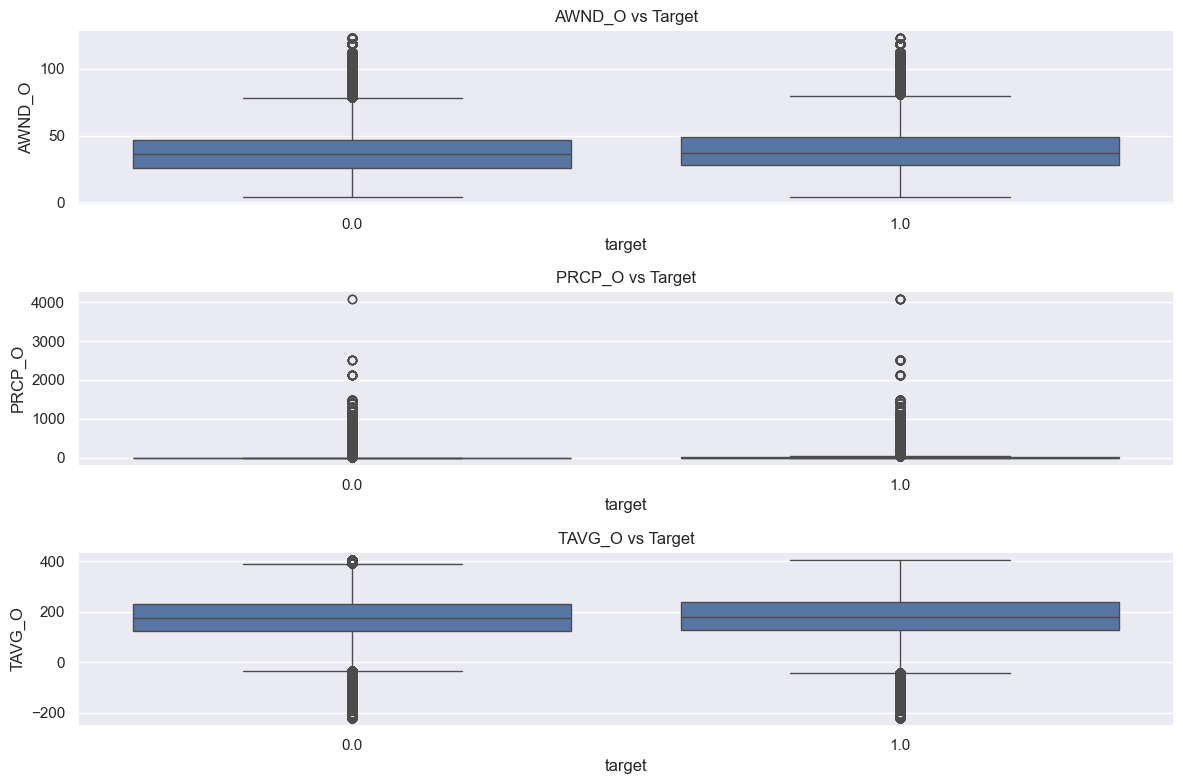

In [ ]:
# Looking into the relation between weather parametres and target classes (no delay, delay) for Origin

# Setting the figure size
plt.figure(figsize=(12, 8))

# Creating subplots for each feature vs target
plt.subplot(3, 1, 1)
sns.boxplot(x='target', y='AWND_O', data=data)
plt.title('AWND_O vs Target')

plt.subplot(3, 1, 2)
sns.boxplot(x='target', y='PRCP_O', data=data)
plt.title('PRCP_O vs Target')

plt.subplot(3, 1, 3)
sns.boxplot(x='target', y='TAVG_O', data=data)
plt.title('TAVG_O vs Target')

# Adjustment of layout for better visibility
plt.tight_layout()
plt.show()


In [ ]:
# Loading Libraries
import scipy.stats as stats

# Calculation of point-biserial correlation between the target and each feature
correlation_tavg = stats.pointbiserialr(data['target'], data['TAVG_O'])[0]
correlation_prcp = stats.pointbiserialr(data['target'], data['PRCP_O'])[0]
correlation_awnd = stats.pointbiserialr(data['target'], data['AWND_O'])[0]

# To Display the results
print(f"Correlation between TAVG_O and Target: {correlation_tavg}")
print(f"Correlation between PRCP_O and Target: {correlation_prcp}")
print(f"Correlation between AWND_O and Target: {correlation_awnd}")


Correlation between TAVG_O and Target: -0.002993062521895276
Correlation between PRCP_O and Target: 0.10392464866141739
Correlation between AWND_O and Target: 0.045660708672408956


**Result Evaluation Origin:**

Class 1 (delay) has slight and negligible correlation between precipation(rain) and air wind. Class 0 shows a negligible positive correlation with temperature increase.


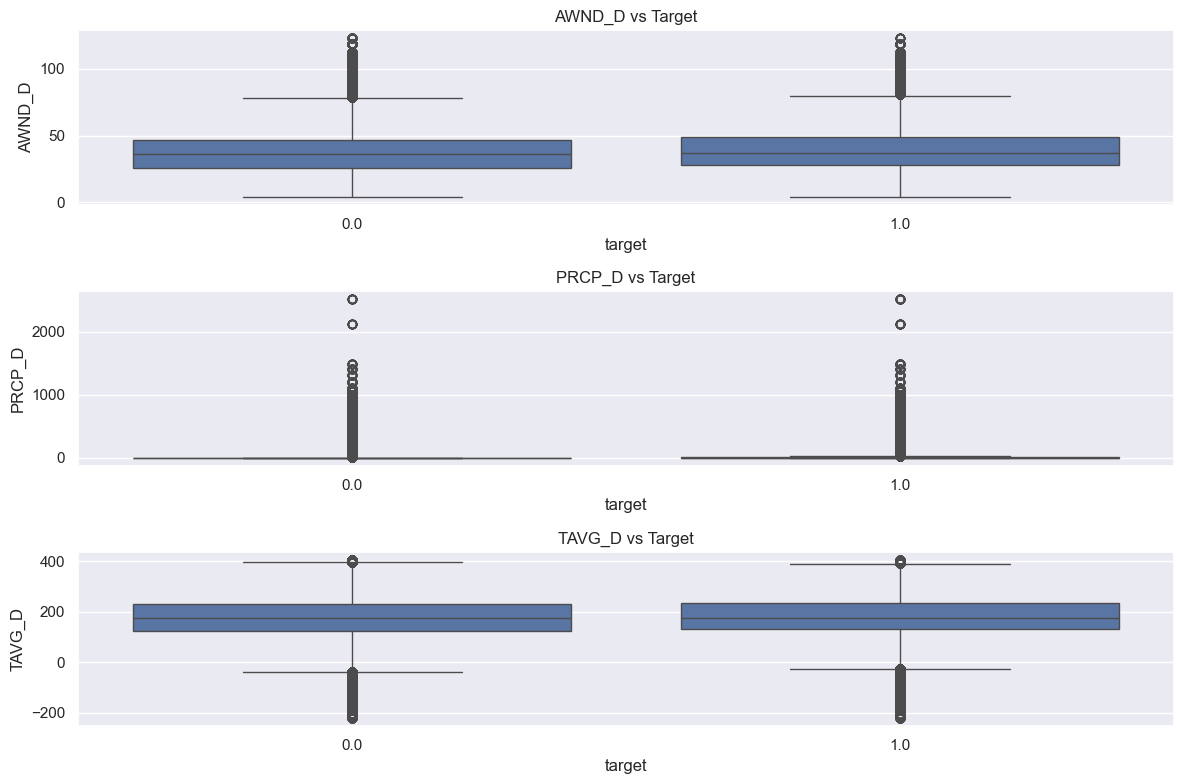

In [9]:
# Looking into the relation between weather parametres and target classes (no delay, delay) for Destination

# Setting the figure size
plt.figure(figsize=(12, 8))

# Creating subplots for each feature vs target
plt.subplot(3, 1, 1)
sns.boxplot(x='target', y='AWND_D', data=data)
plt.title('AWND_D vs Target')

plt.subplot(3, 1, 2)
sns.boxplot(x='target', y='PRCP_D', data=data)
plt.title('PRCP_D vs Target')

plt.subplot(3, 1, 3)
sns.boxplot(x='target', y='TAVG_D', data=data)
plt.title('TAVG_D vs Target')

# Adjustment of layout for better visibility
plt.tight_layout()
plt.show()


In [10]:
# Loading Libraries
import scipy.stats as stats

# Calculation of point-biserial correlation between the target and each feature
correlation_tavg_d = stats.pointbiserialr(data['target'], data['TAVG_D'])[0]
correlation_prcp_d = stats.pointbiserialr(data['target'], data['PRCP_D'])[0]
correlation_awnd_d = stats.pointbiserialr(data['target'], data['AWND_D'])[0]

# To Display the results
print(f"Correlation between TAVG_D and Target: {correlation_tavg_d}")
print(f"Correlation between PRCP_D and Target: {correlation_prcp_d}")
print(f"Correlation between AWND_D and Target: {correlation_awnd_d}")

Correlation between TAVG_D and Target: 0.007336436549567389
Correlation between PRCP_D and Target: 0.09483242661681549
Correlation between AWND_D and Target: 0.04573607970125702


**Result Evaluation Destination:**

There is ever so slight positive relation between weather parametres and destination airports. It may well have helped to predict the arrival delay a little bit better but the improvement was not significant.

In [ ]:
# Converting 'is_holiday' to 1 (True) and 0 (False)
data['is_holiday_numeric'] = data['is_holiday_True'].astype(int)

# Calculating point-biserial correlation between target and is_holiday
correlation_holiday_target = stats.pointbiserialr(data['target'], data['is_holiday_numeric'])[0]

# To Display the result
print(f"Correlation between Target and is_holiday: {correlation_holiday_target}")


Correlation between Target and is_holiday: -0.002254299815515058


> Flight delay is not related with holidays.

Question: did you notice a difference by adding the extra data on the results?


The was slight improvement in accuracy, precision, recalls and other parametres with added features, compared to the first model. But it is not significant enough to make accurate prediction and the confusion matrix showed that there were significant amount of True Positives that could not be identified. A more robust model is required to work with this dataset.

But one thing is noticable that, added features did affect and improved the model, be it very little.

# Step 6: Using Tableau

Use Tableau to load the combined_csv_v2.csv file and build a dashboard that show your understanding of the data and business problem. 
### what to do:
1. Load the data into Tableau and build the dashboard
2. Share the dashboard on your Tableau public account 
3. Copy the link of the shared dashboard below

Note: The dashboard needs to be self explainable to others, so make it simple and add only the features that you feel heighlight the main question(s) of the problem statement.

**Tableau Dashboard**

> used dataset: combined_data.csv 
Due to limitation of size for dataset, used the 'combined_data.csv'. The version of Tableau could not load larger dataset.

Link1: *ArrDel/ArrDel15(True) by Year*
> https://public.tableau.com/views/finalproject_PartA_u3267686/ArrDelDelay_True?:language=en-US&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link

Link2: *Dest/Origin by ArrDel15(Delay_True)*
> https://public.tableau.com/shared/DMBMDJJTN?:display_count=n&:origin=viz_share_link

## Conclusion

You've now gone through at least a couple iterations of training and evaluating your model. It's time to wrap up this project and reflect on what you've learned and what types of steps you might take moving forward (assuming you had more time). Use the cell below to answer some of these and other relevant questions:

1. Does your model performance meet your business goal? If not, what are some things you'd like to do differently if you had more time for tuning?
2. To what extent did your model improve as you made changes to your dataset? What types of techniques did you employ throughout this project that you felt yielded the greatest improvements in your model?
3. What were some of the biggest challenges you encountered throughout this project?
4. What were the three most important things you learned about machine learning while completing this project?

**On Meeting Goals and other possible approach:**

The performance of the model is not acceptable to make prdiction for flight delays. Even with added features of weather data and holidays, the performance didn't improve. Another option can be to add historical delay data for Reporting Airlines and airports, flights coming in and out. The patterns there can help in building more robust model.
As there was issue of class imbalances, techniques like SMOTE (Synthetic Minority Over-sampling Technique) can be considered to balance the class distribution by oversampling the minority class, or undersampling the majority class.
Most importantly,Algorithms such as Random Forest, Gradient Boosting, or XGBoost should be considered as it often perform well on tabular data with complex relationships.

**Effect of added features on Model:**

With more features, With the addition of characteristics, accuracy, precision, recalls, and other parameters improved slightly as compared to the initial model. However, it is not substantial enough to provide an accurate prediction, and the confusion matrix revealed that a significant number of True Positives could not be detected. Working with this dataset requires a more robust model. However, it is clear that the addition of features had an impact on and improved the model, but only little.

**Biggest Challenges:**

Memory is the biggest aconcern when running algorithms like Random Forest, Gradient Boosting, or XGBoost on large datasets with complex relationships, especially on a local machine. Mitigation can be done to the dataset to adjust to CPU memory usage but it will yield weaker result compared to model prepared by using optimum capability. So it has to be said that complex robust algorithms needs higher memory and computational capability.

**Learning Outcomes:**

EDA is important to understand the structure and distribution of data. Data distributions and summary statistics can show the spread of data, skewness, and the presence of outliers, to make decisions on scaling or transformations. From this dataset we faced the issue of class imbalance and importance of precision, recall, F1-score, and AUC-ROC instead of relying solely on accuracy for performance evaluation. With Pair plots, heatmaps, and scatter plots, we saw how different variables interact with each other, helping to spot both positive and negative correlations.

Domain Knowledge can help (in this case understanding the relation between time, weather, holiday etc.) in handling the features more meaningfully. It also shows the importance of adding additional relatable data as features. We have seen changes in preformance as well with added features, though not significant.

From this project, it is seen that the necessity of thorough preprocessing, such as handling missing values, encoding categorical variables, and scaling features when required. These are necessary to  iterate through algorithm and select the perfect model. We also have to word around the constraint of machine's memory usage and computational capability.


